In [2]:
# 라이브러리
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
# 시각화를 위한 한글 폰트 설정
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
# 시각화 선명하게 설정
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 더 선명하게 보임
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [92]:
# 파일불러오기 ( NS 홈쇼핑 - 실적 데이터 )
ns = pd.read_csv("dummy2.csv")
ns

Unnamed: 0             datetime  exposure  mother_code    code  \
0               0  2019-01-01 06:00:00      20.0       100346  201072   
1               1  2019-01-01 06:00:00       NaN       100346  201079   
2               2  2019-01-01 06:20:00      20.0       100346  201072   
3               3  2019-01-01 06:20:00       NaN       100346  201079   
4               4  2019-01-01 06:40:00      20.0       100346  201072   
...           ...                  ...       ...          ...     ...   
38304       38304  2020-01-01 00:20:00      20.0       100073  200196   
38305       38305  2020-01-01 00:40:00      20.0       100073  200196   
38306       38306  2020-01-01 01:00:00      20.0       100073  200196   
38307       38307  2020-01-01 01:20:00      20.0       100490  201478   
38308       38308  2020-01-01 01:40:00      17.0       100490  201478   

                           name category    price    revenue  year  month  \
0                 테이트 남성 셀린니트3종       의류  39900.0  2099000.0  2019      1   
1                 테이트 여성 셀린니트3종       의류  39900.0  4371000.0  2019      1   
2                 테이트 남성 셀린니트3종       의류  39900.0  3262000.0  2019      1   
3                 테이트 여성 셀린니트3종       의류  39900.0  6955000.0  2019      1   
4                 테이트 남성 셀린니트3종       의류  39900.0  6672000.0  2019      1   
...                         ...      ...      ...        ...   ...    ...   
38304  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38305  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38306  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38307        더케이 예다함 상조서비스(티포트)       무형      NaN        NaN  2020      1   
38308        더케이 예다함 상조서비스(티포트)       무형      NaN        NaN  2020      1   

       date      time       count sex installment  dayofweek  
0         1  06:00:00   52.606516  남성          무관          1  
1         1  06:00:00  109.548872  여성          무관          1  
2         1  06:20:00   81.754386  남성          무관          1  
3         1  06:20:00  174.310777  여성          무관          1  
4         1  06:40:00  167.218045  남성          무관          1  
...     ...       ...         ...  ..         ...        ...  
38304     1  00:20:00         NaN  무관          무관          2  
38305     1  00:40:00         NaN  무관          무관          2  
38306     1  01:00:00         NaN  무관          무관          2  
38307     1  01:20:00         NaN  무관          무관          2  
38308     1  01:40:00         NaN  무관          무관          2  

[38309 rows x 17 columns]

In [94]:
ns['YMD'] = ns['datetime'].astype(str).map(lambda x : x[:10]) # 시간제외
ns['YMD'].head(100) # 확인 완료 

0     2019-01-01
1     2019-01-01
2     2019-01-01
3     2019-01-01
4     2019-01-01
         ...    
95    2019-01-02
96    2019-01-02
97    2019-01-02
98    2019-01-02
99    2019-01-02
Name: YMD, Length: 100, dtype: object

In [95]:
ns['YMD'] = pd.to_datetime(ns['YMD'])
ns['month'] = ns['YMD'].dt.month
ns

Unnamed: 0             datetime  exposure  mother_code    code  \
0               0  2019-01-01 06:00:00      20.0       100346  201072   
1               1  2019-01-01 06:00:00       NaN       100346  201079   
2               2  2019-01-01 06:20:00      20.0       100346  201072   
3               3  2019-01-01 06:20:00       NaN       100346  201079   
4               4  2019-01-01 06:40:00      20.0       100346  201072   
...           ...                  ...       ...          ...     ...   
38304       38304  2020-01-01 00:20:00      20.0       100073  200196   
38305       38305  2020-01-01 00:40:00      20.0       100073  200196   
38306       38306  2020-01-01 01:00:00      20.0       100073  200196   
38307       38307  2020-01-01 01:20:00      20.0       100490  201478   
38308       38308  2020-01-01 01:40:00      17.0       100490  201478   

                           name category    price    revenue  year  month  \
0                 테이트 남성 셀린니트3종       의류  39900.0  2099000.0  2019      1   
1                 테이트 여성 셀린니트3종       의류  39900.0  4371000.0  2019      1   
2                 테이트 남성 셀린니트3종       의류  39900.0  3262000.0  2019      1   
3                 테이트 여성 셀린니트3종       의류  39900.0  6955000.0  2019      1   
4                 테이트 남성 셀린니트3종       의류  39900.0  6672000.0  2019      1   
...                         ...      ...      ...        ...   ...    ...   
38304  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38305  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38306  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38307        더케이 예다함 상조서비스(티포트)       무형      NaN        NaN  2020      1   
38308        더케이 예다함 상조서비스(티포트)       무형      NaN        NaN  2020      1   

       date      time       count sex installment  dayofweek        YMD  
0         1  06:00:00   52.606516  남성          무관          1 2019-01-01  
1         1  06:00:00  109.548872  여성          무관          1 2019-01-01  
2         1  06:20:00   81.754386  남성          무관          1 2019-01-01  
3         1  06:20:00  174.310777  여성          무관          1 2019-01-01  
4         1  06:40:00  167.218045  남성          무관          1 2019-01-01  
...     ...       ...         ...  ..         ...        ...        ...  
38304     1  00:20:00         NaN  무관          무관          2 2020-01-01  
38305     1  00:40:00         NaN  무관          무관          2 2020-01-01  
38306     1  01:00:00         NaN  무관          무관          2 2020-01-01  
38307     1  01:20:00         NaN  무관          무관          2 2020-01-01  
38308     1  01:40:00         NaN  무관          무관          2 2020-01-01  

[38309 rows x 18 columns]

In [8]:
revenue =  pd.pivot_table(ns, values='revenue', index=['YMD'],  aggfunc=np.sum)
revenue = revenue.reset_index() # 총합만 가지고 인덱스를 세로 리셋

revenue # 이익의 총  합만 하나의 데이터화 
revenue = revenue['revenue']
revenue

0      2.712779e+09
1      2.011323e+09
2      2.062243e+09
3      2.049444e+09
4      2.588590e+09
           ...     
361    2.707108e+09
362    2.706856e+09
363    2.224920e+09
364    2.313063e+09
365    2.156940e+08
Name: revenue, Length: 366, dtype: float64

In [14]:
count =  pd.pivot_table(ns, values='count', index=['YMD'],  aggfunc=np.sum)
count = count.reset_index() # 총합만 가지고 인덱스를 세로 리셋
count = count['count']

count

0      36326.952820
1      28589.405112
2      27535.025136
3      30233.621650
4      32936.100644
           ...     
360    38497.527750
361    41862.985781
362    37008.067507
363    38254.948980
364    28034.114428
Name: count, Length: 365, dtype: float64

In [96]:
# 파일불러오기 ( 날씨 데이터 (평균,최저,최고, 강수량 전국 평균) )
weather = pd.read_csv("서울.csv",encoding='cp949')
weather

YMD  평균기온  최고기온  최저기온  강수량  신적설  평균풍속  평균습도   운량  일조시간  미세먼지  \
0    2019-01-01  -5.0  -0.6  -8.2  0.0  0.0   2.2    50  3.4   7.5  41.0   
1    2019-01-02  -4.9   0.2  -8.8  0.0  0.0   1.7    43  0.0   8.7  38.0   
2    2019-01-03  -3.5   3.2  -8.4  0.0  0.0   1.3    39  0.1   8.7  41.0   
3    2019-01-04  -1.1   4.1  -6.2  0.0  0.0   1.2    56  5.5   3.9  77.0   
4    2019-01-05  -2.8   1.1  -5.5  0.0  0.0   2.2    40  0.5   8.6  73.0   
..          ...   ...   ...   ...  ...  ...   ...   ...  ...   ...   ...   
360  2019-12-27  -1.7   2.6  -4.6  0.0  0.0   2.2    45  0.0   9.0  37.0   
361  2019-12-28   1.1   6.1  -3.6  0.0  0.0   2.0    48  3.5   5.8  47.0   
362  2019-12-29   3.8   6.2   1.1  1.4  0.0   3.0    53  9.0   0.0  47.0   
363  2019-12-30   2.6   6.8  -5.7  0.4  0.0   2.9    70  7.5   0.0  43.0   
364  2019-12-31  -7.9  -4.5 -10.9  0.0  0.0   3.1    39  1.2   9.1  31.0   

     체감기온           날씨  
0    -7.1         구름조금  
1    -6.5           맑음  
2    -4.5           맑음  
3    -1.9      구름많음/안개  
4    -4.9        맑음/안개  
..    ...          ...  
360  -4.0        맑음/안개  
361  -1.0         구름조금  
362   1.2         흐림/비  
363   1.4  구름많음/눈/비/안개  
364 -12.5         맑음/눈  

[365 rows x 13 columns]

In [20]:
# 날짜 데이터와 결합 
ns = pd.concat([revenue, weather], axis =1)
ns

revenue         YMD  평균기온  최고기온  최저기온  강수량  신적설  평균풍속  평균습도   운량  \
0    2.712779e+09  2019-01-01  -5.0  -0.6  -8.2  0.0  0.0   2.2  50.0  3.4   
1    2.011323e+09  2019-01-02  -4.9   0.2  -8.8  0.0  0.0   1.7  43.0  0.0   
2    2.062243e+09  2019-01-03  -3.5   3.2  -8.4  0.0  0.0   1.3  39.0  0.1   
3    2.049444e+09  2019-01-04  -1.1   4.1  -6.2  0.0  0.0   1.2  56.0  5.5   
4    2.588590e+09  2019-01-05  -2.8   1.1  -5.5  0.0  0.0   2.2  40.0  0.5   
..            ...         ...   ...   ...   ...  ...  ...   ...   ...  ...   
361  2.707108e+09  2019-12-28   1.1   6.1  -3.6  0.0  0.0   2.0  48.0  3.5   
362  2.706856e+09  2019-12-29   3.8   6.2   1.1  1.4  0.0   3.0  53.0  9.0   
363  2.224920e+09  2019-12-30   2.6   6.8  -5.7  0.4  0.0   2.9  70.0  7.5   
364  2.313063e+09  2019-12-31  -7.9  -4.5 -10.9  0.0  0.0   3.1  39.0  1.2   
365  2.156940e+08         NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN   

     일조시간  미세먼지  체감기온           날씨  
0     7.5  41.0  -7.1         구름조금  
1     8.7  38.0  -6.5           맑음  
2     8.7  41.0  -4.5           맑음  
3     3.9  77.0  -1.9      구름많음/안개  
4     8.6  73.0  -4.9        맑음/안개  
..    ...   ...   ...          ...  
361   5.8  47.0  -1.0         구름조금  
362   0.0  47.0   1.2         흐림/비  
363   0.0  43.0   1.4  구름많음/눈/비/안개  
364   9.1  31.0 -12.5         맑음/눈  
365   NaN   NaN   NaN          NaN  

[366 rows x 14 columns]

In [21]:
ns = pd.concat([count, ns], axis =1)
ns

count       revenue         YMD  평균기온  최고기온  최저기온  강수량  신적설  평균풍속  \
0    36326.952820  2.712779e+09  2019-01-01  -5.0  -0.6  -8.2  0.0  0.0   2.2   
1    28589.405112  2.011323e+09  2019-01-02  -4.9   0.2  -8.8  0.0  0.0   1.7   
2    27535.025136  2.062243e+09  2019-01-03  -3.5   3.2  -8.4  0.0  0.0   1.3   
3    30233.621650  2.049444e+09  2019-01-04  -1.1   4.1  -6.2  0.0  0.0   1.2   
4    32936.100644  2.588590e+09  2019-01-05  -2.8   1.1  -5.5  0.0  0.0   2.2   
..            ...           ...         ...   ...   ...   ...  ...  ...   ...   
361  41862.985781  2.707108e+09  2019-12-28   1.1   6.1  -3.6  0.0  0.0   2.0   
362  37008.067507  2.706856e+09  2019-12-29   3.8   6.2   1.1  1.4  0.0   3.0   
363  38254.948980  2.224920e+09  2019-12-30   2.6   6.8  -5.7  0.4  0.0   2.9   
364  28034.114428  2.313063e+09  2019-12-31  -7.9  -4.5 -10.9  0.0  0.0   3.1   
365           NaN  2.156940e+08         NaN   NaN   NaN   NaN  NaN  NaN   NaN   

     평균습도   운량  일조시간  미세먼지  체감기온           날씨  
0    50.0  3.4   7.5  41.0  -7.1         구름조금  
1    43.0  0.0   8.7  38.0  -6.5           맑음  
2    39.0  0.1   8.7  41.0  -4.5           맑음  
3    56.0  5.5   3.9  77.0  -1.9      구름많음/안개  
4    40.0  0.5   8.6  73.0  -4.9        맑음/안개  
..    ...  ...   ...   ...   ...          ...  
361  48.0  3.5   5.8  47.0  -1.0         구름조금  
362  53.0  9.0   0.0  47.0   1.2         흐림/비  
363  70.0  7.5   0.0  43.0   1.4  구름많음/눈/비/안개  
364  39.0  1.2   9.1  31.0 -12.5         맑음/눈  
365   NaN  NaN   NaN   NaN   NaN          NaN  

[366 rows x 15 columns]

In [22]:
ns['YMD'] = pd.to_datetime(ns['YMD'])
ns['month'] = ns['YMD'].dt.month

### revenue - 서울 평균기온, 강수량, 미세먼지, 평균습도, 평균풍속, 일조량

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


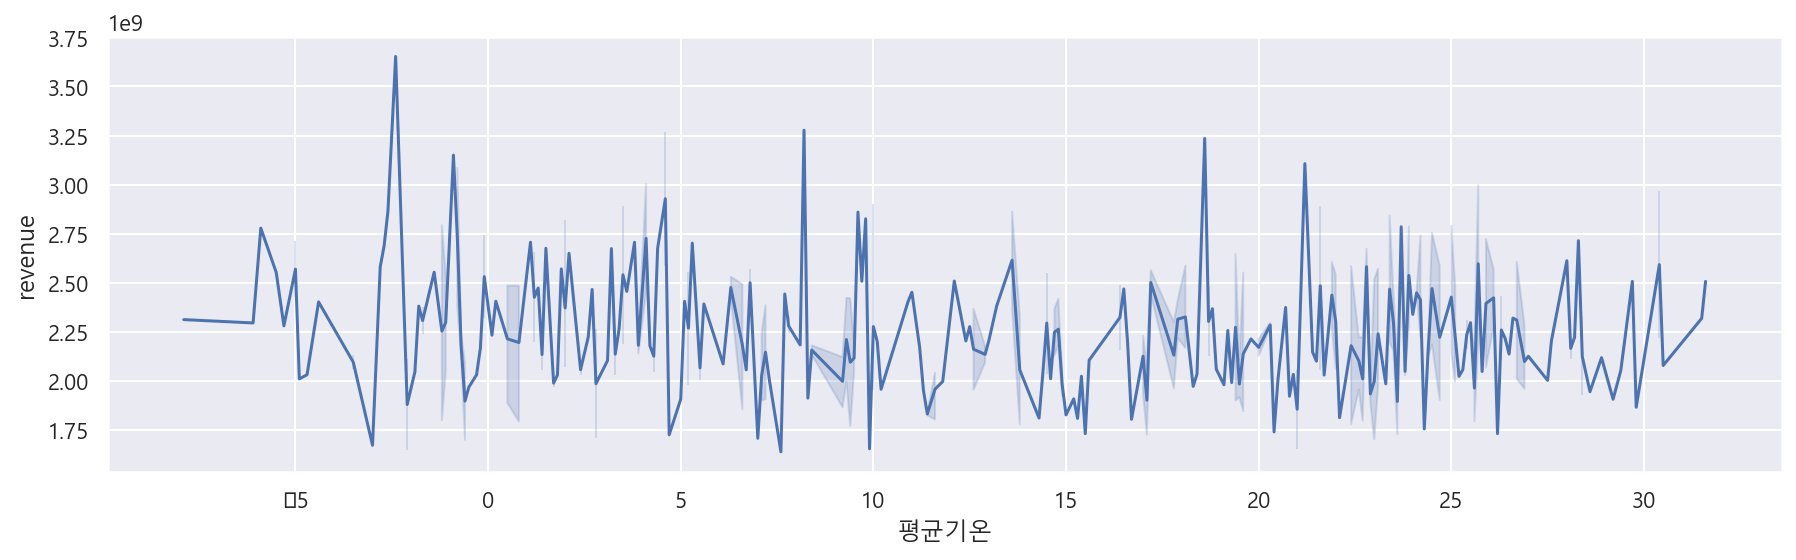

In [23]:
# 평균기온 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='평균기온', y='revenue')

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 1080x288 with 0 Axes>

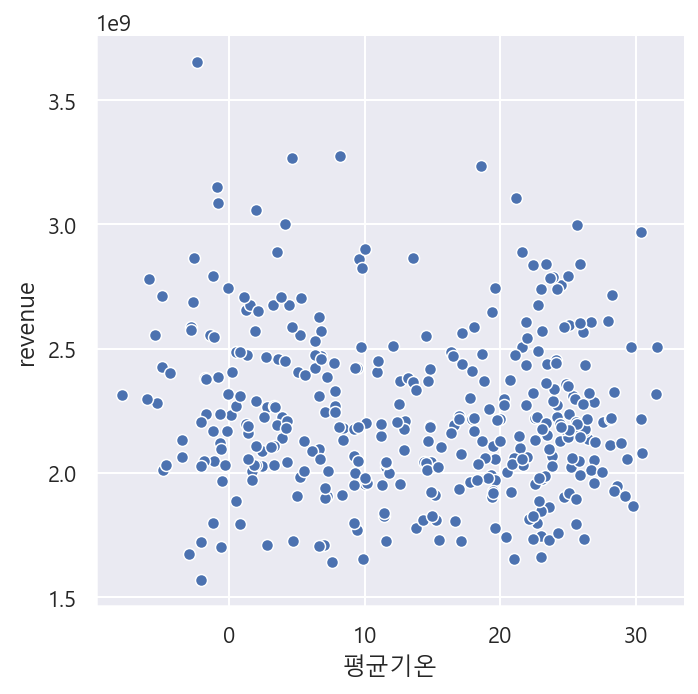

In [24]:
# 평균기온 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='평균기온', y='revenue')

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1080x288 with 0 Axes>

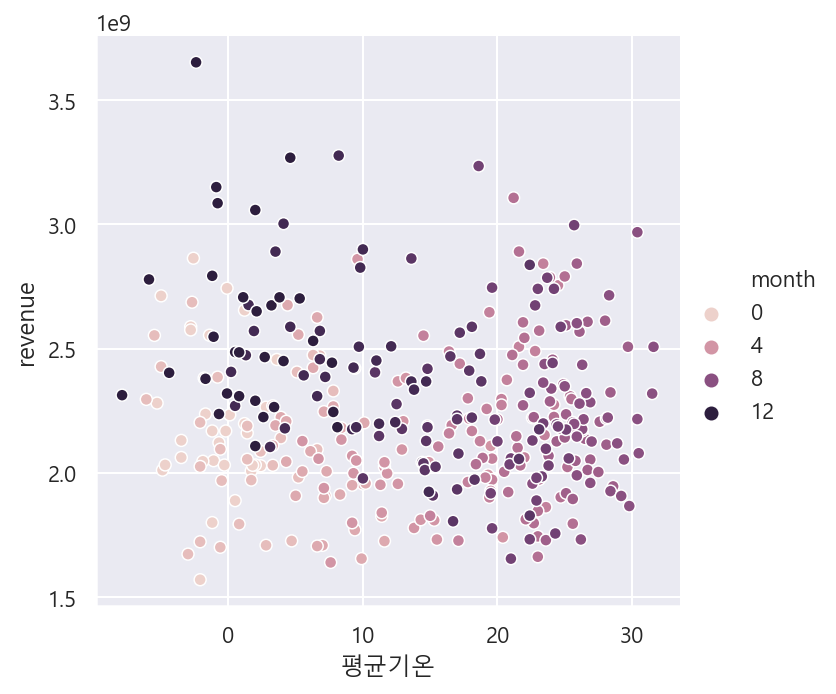

In [25]:
# 평균기온 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='평균기온', y='revenue', hue = 'month')

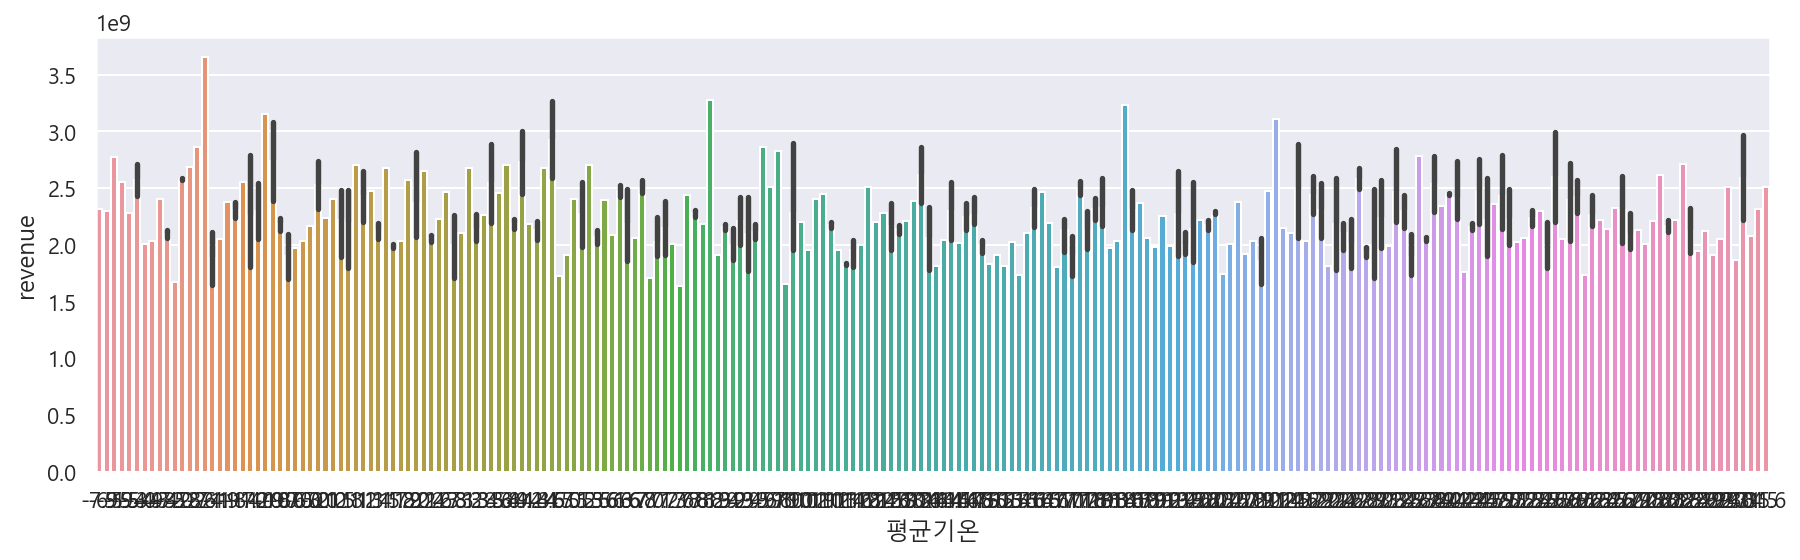

In [27]:
# 평균기온 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='평균기온', y='revenue')

## 확실히 기온이 낮을수록 총수익이 높다!!!

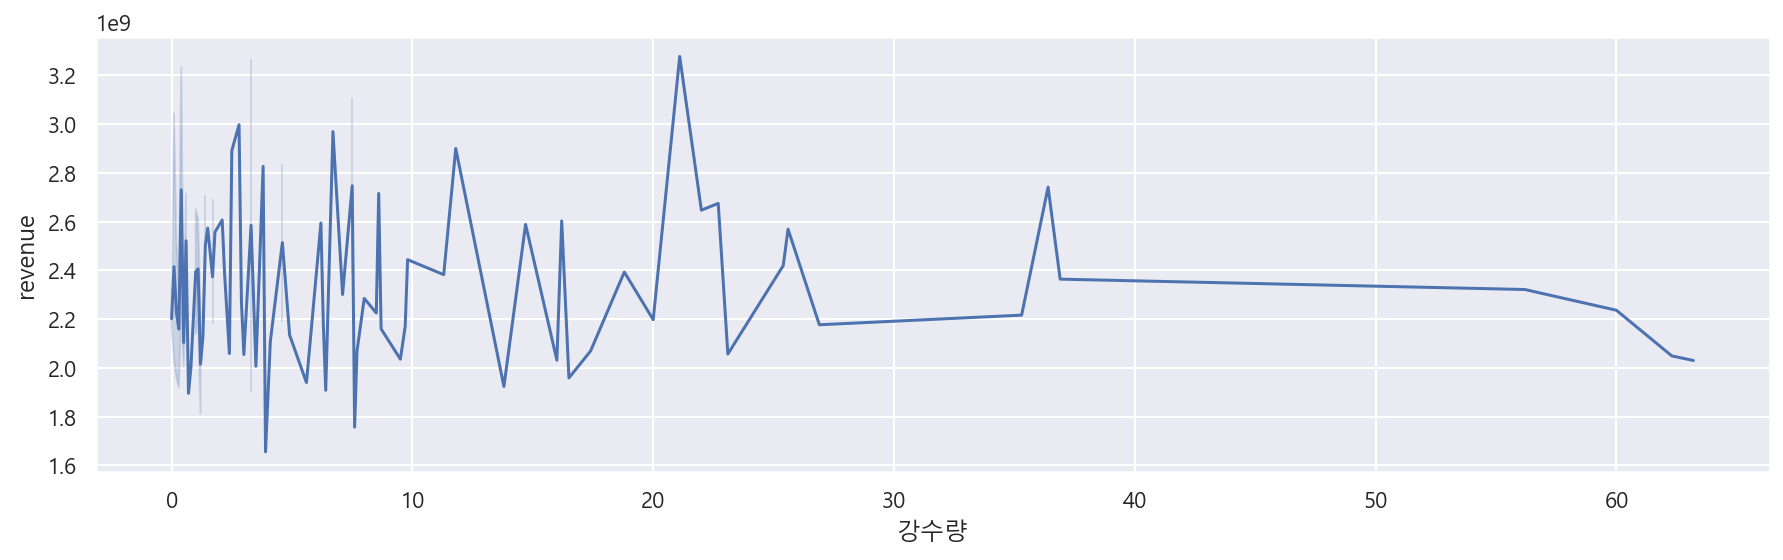

In [28]:
# 강수량 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='강수량', y='revenue')

<Figure size 1080x288 with 0 Axes>

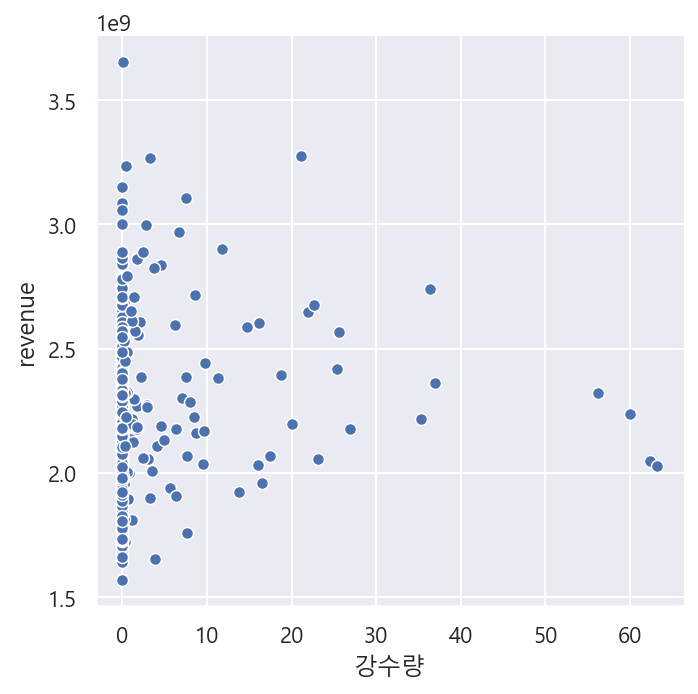

In [29]:
# 강수량 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='강수량', y='revenue')

<Figure size 1080x288 with 0 Axes>

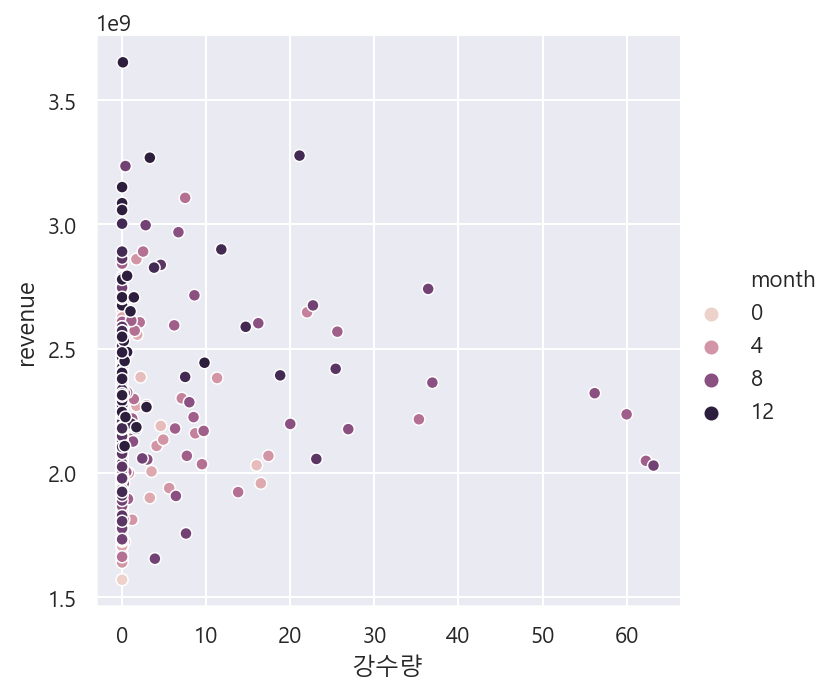

In [30]:
# 강수량 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='강수량', y='revenue',hue='month')

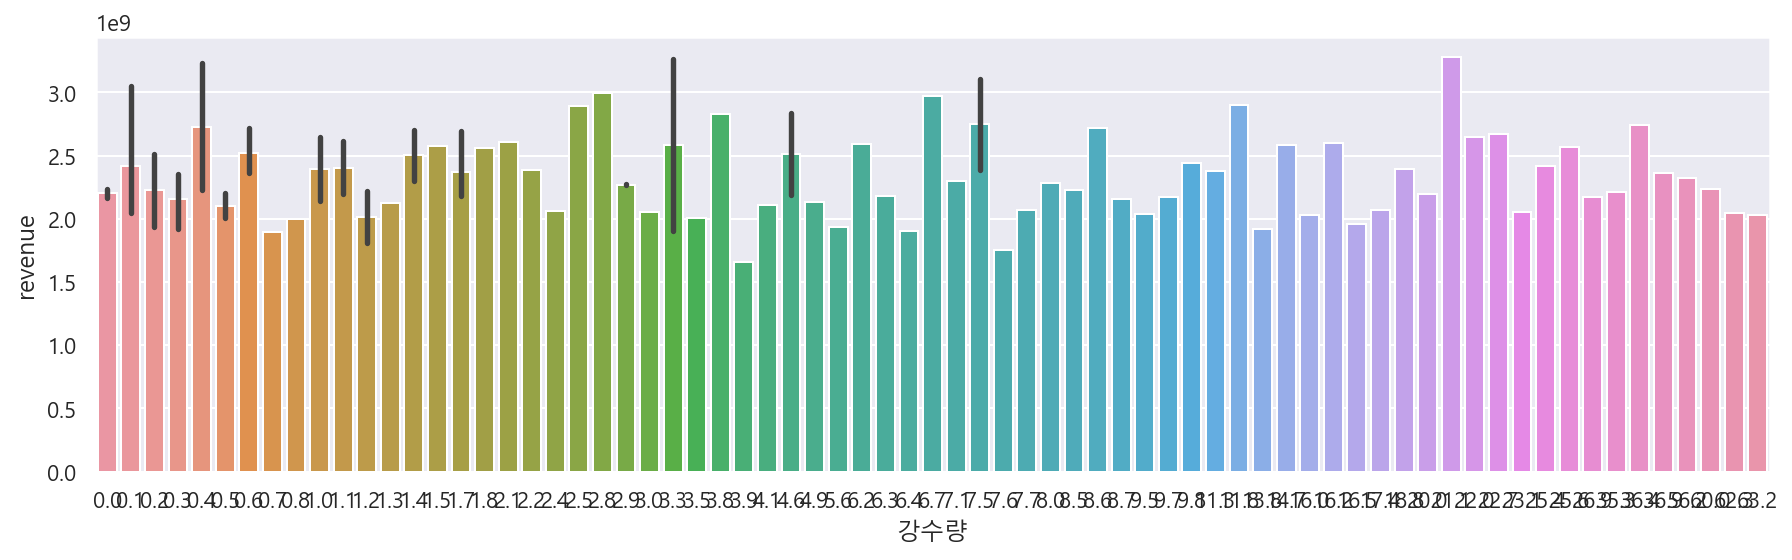

In [31]:
# 강수량 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='강수량', y='revenue')

### 역시나 강수량은 모르겠다...

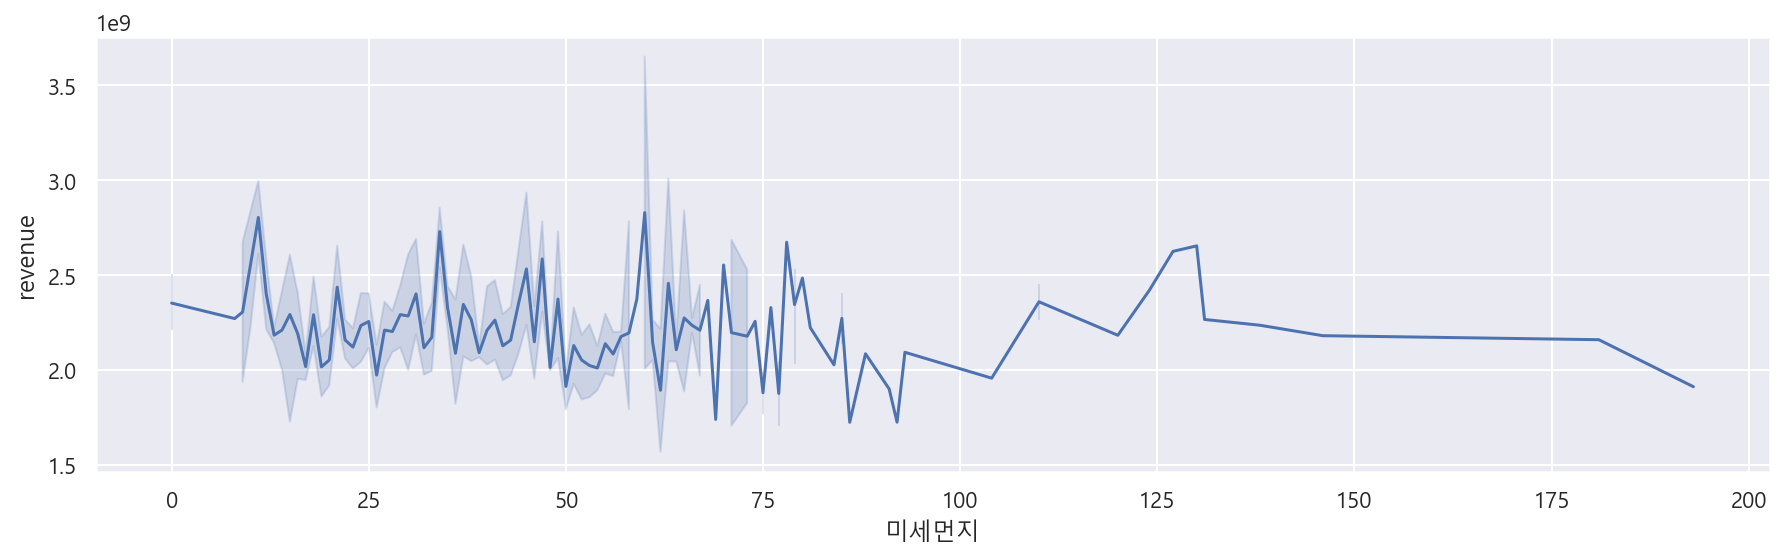

In [32]:
# 미세먼지 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='미세먼지', y='revenue')

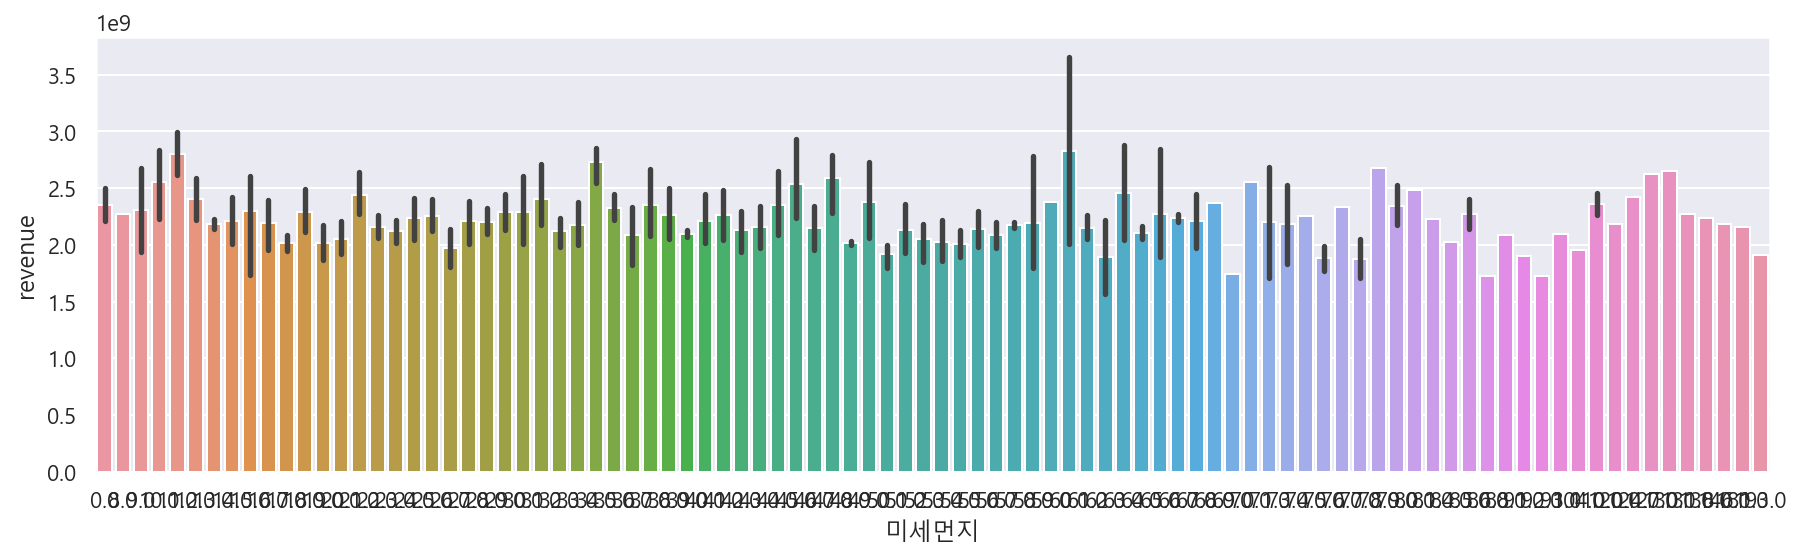

In [33]:
# 미세먼지 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='미세먼지', y='revenue')

<Figure size 1080x288 with 0 Axes>

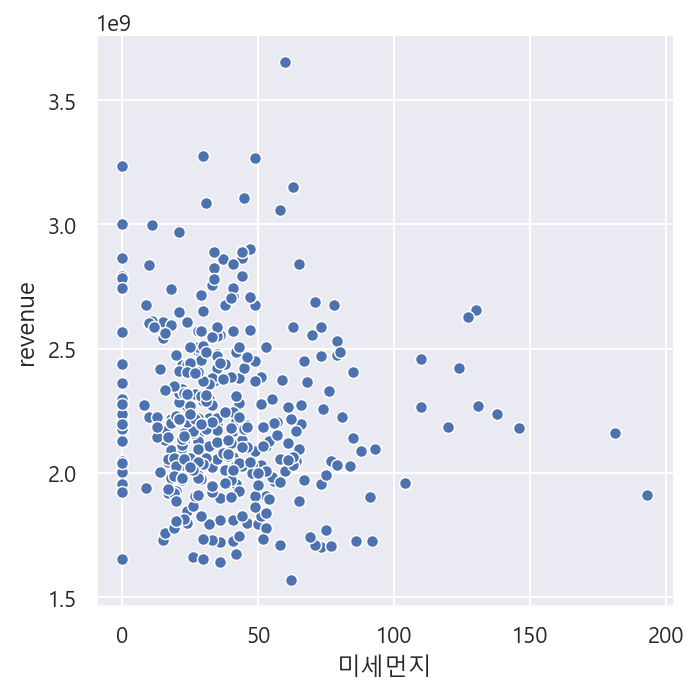

In [34]:
# 미세먼지 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns,  x='미세먼지', y='revenue')

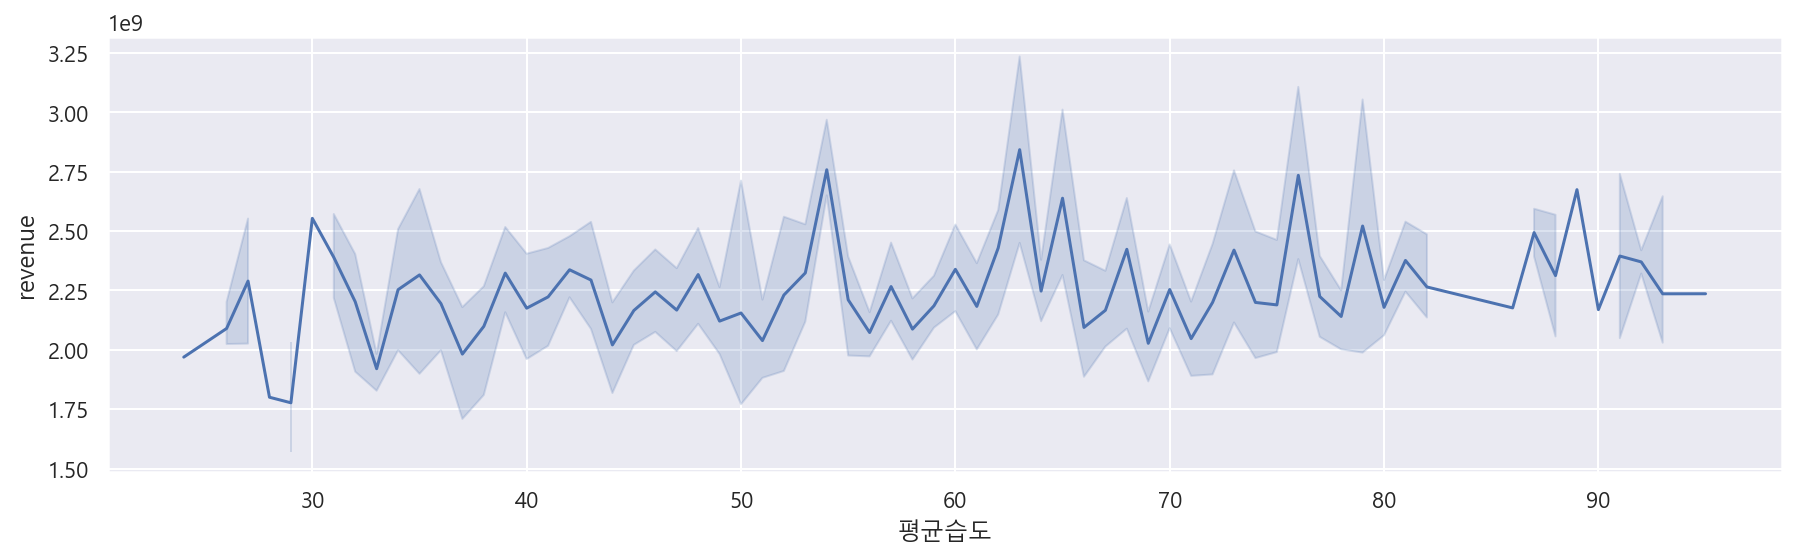

In [35]:
# 평균습도 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='평균습도', y='revenue')

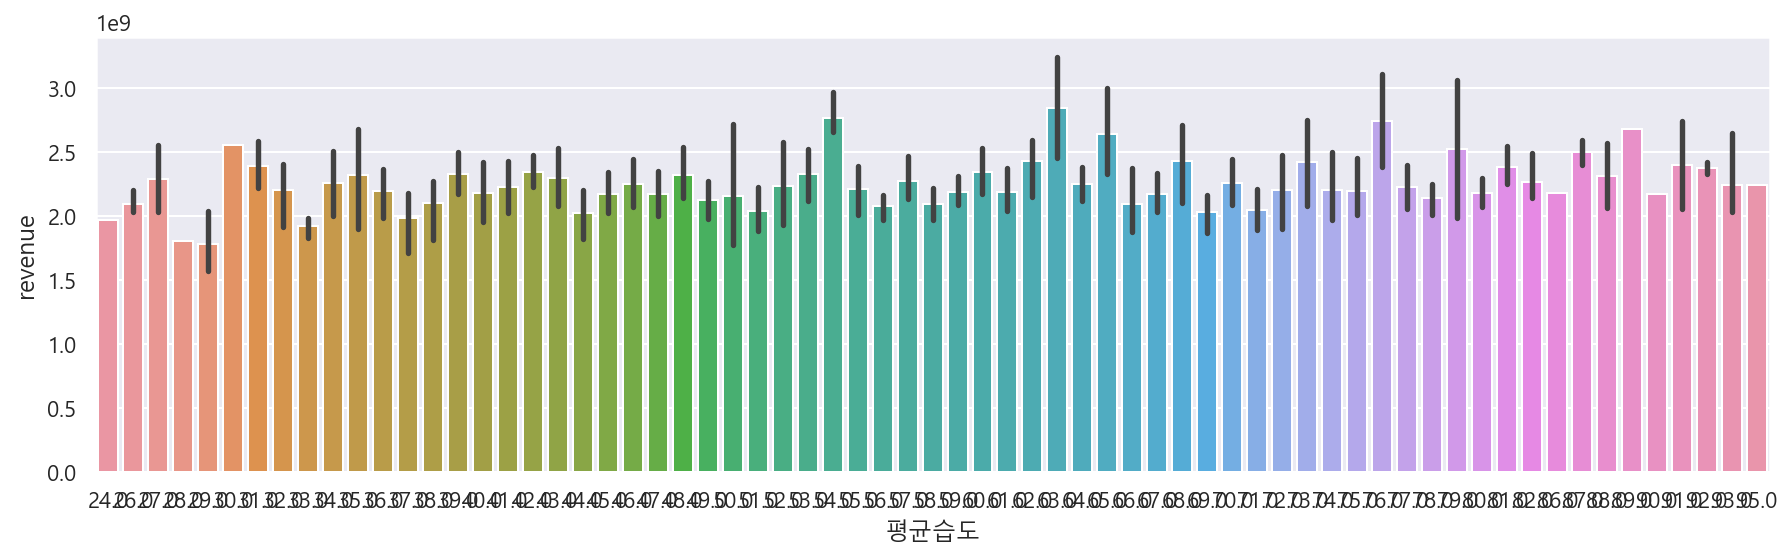

In [36]:
# 평균습도 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='평균습도', y='revenue')

## 습도가 낮을 때가 더 적을 때, 사람들이 많이 돌아다니보다 수익이 적어졌다. 

<Figure size 1080x288 with 0 Axes>

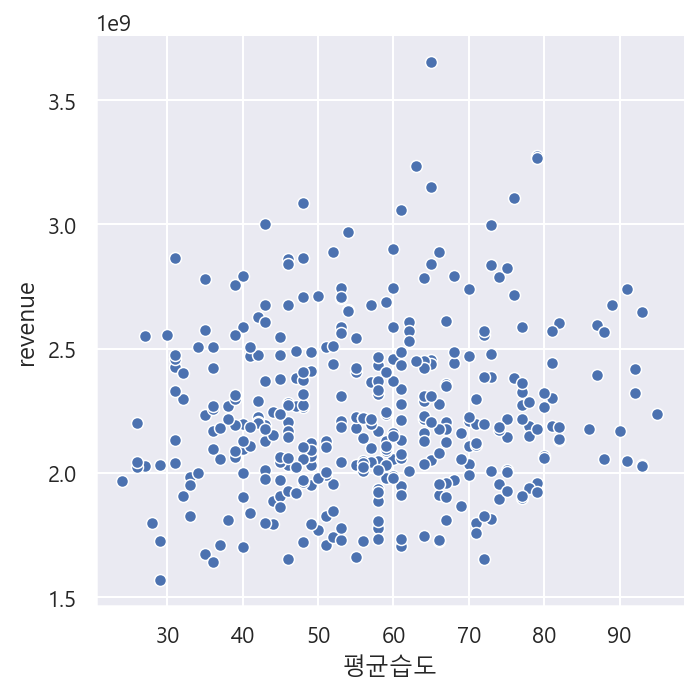

In [37]:
# 평균습도 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='평균습도', y='revenue')

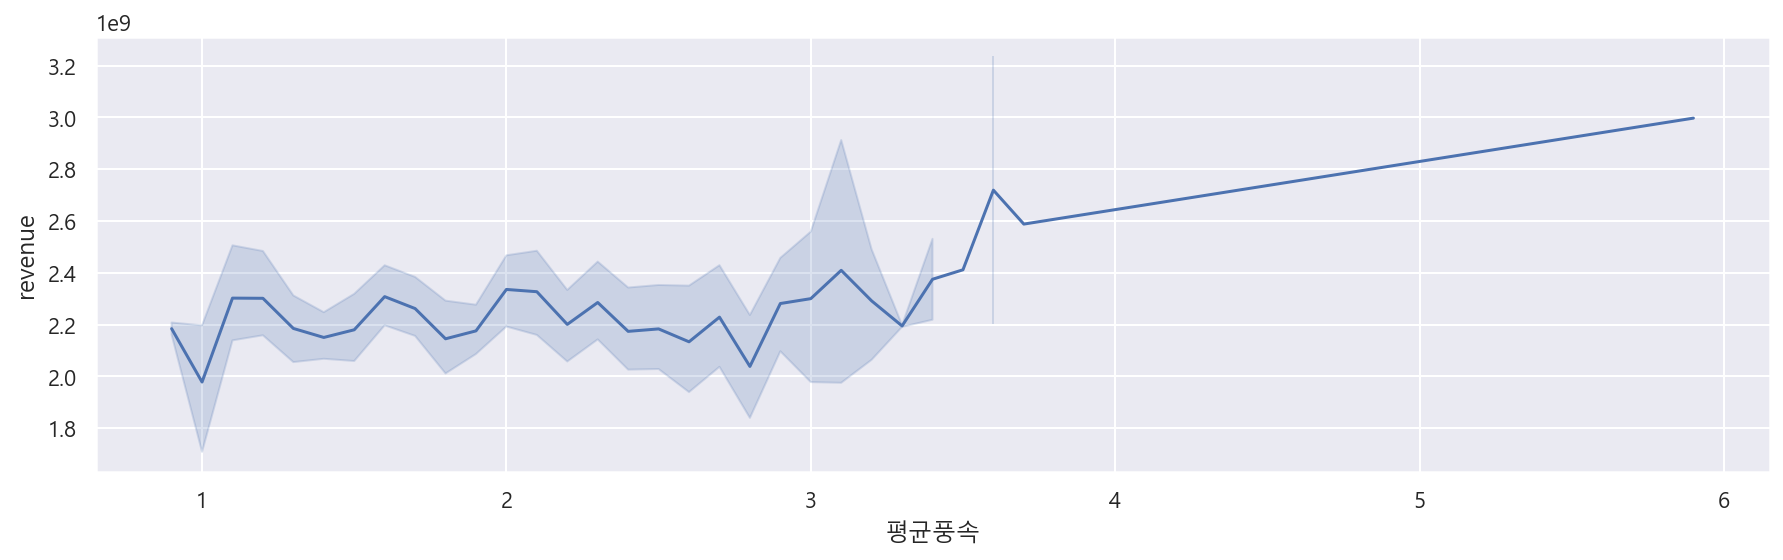

In [38]:
# 평균풍속 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='평균풍속', y='revenue')

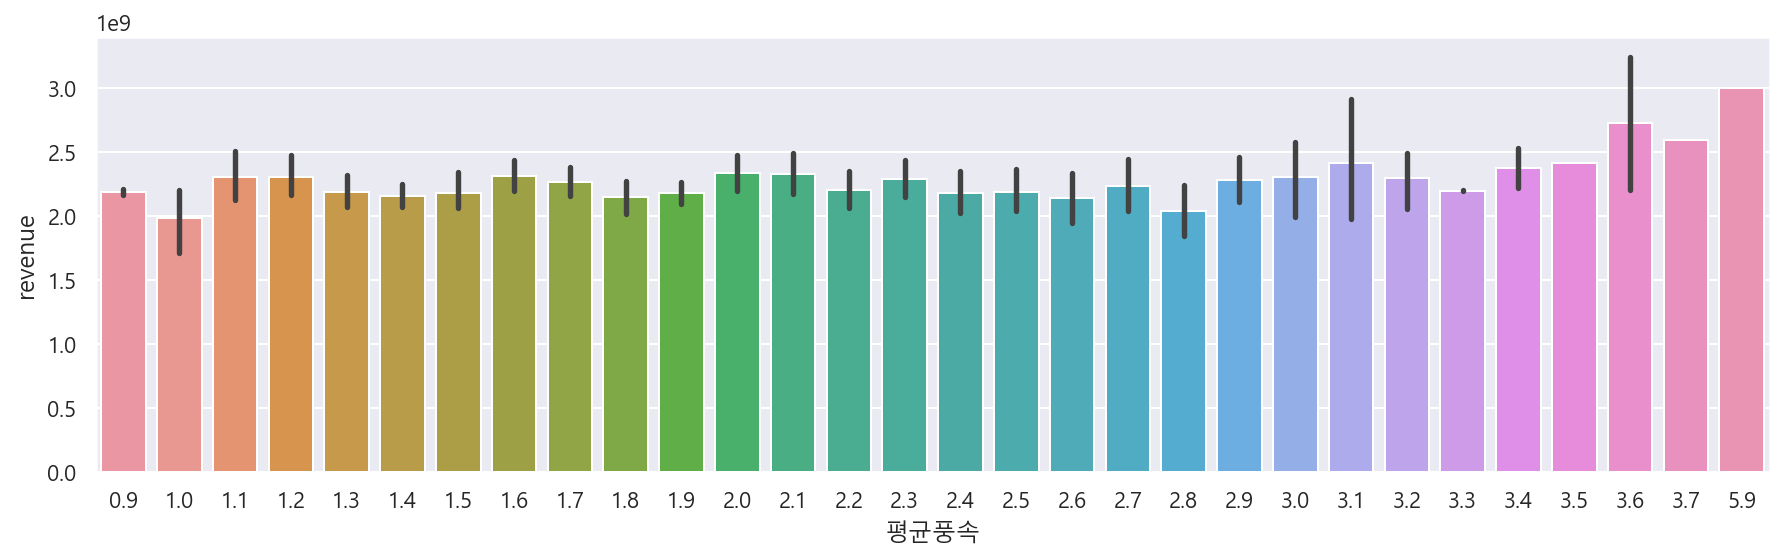

In [39]:
# 평균풍속 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='평균풍속', y='revenue')

## 오!!!!! 하나 찾은거 같아 풍속이 높으니깐 총수익이 올라가!!!

<Figure size 1080x288 with 0 Axes>

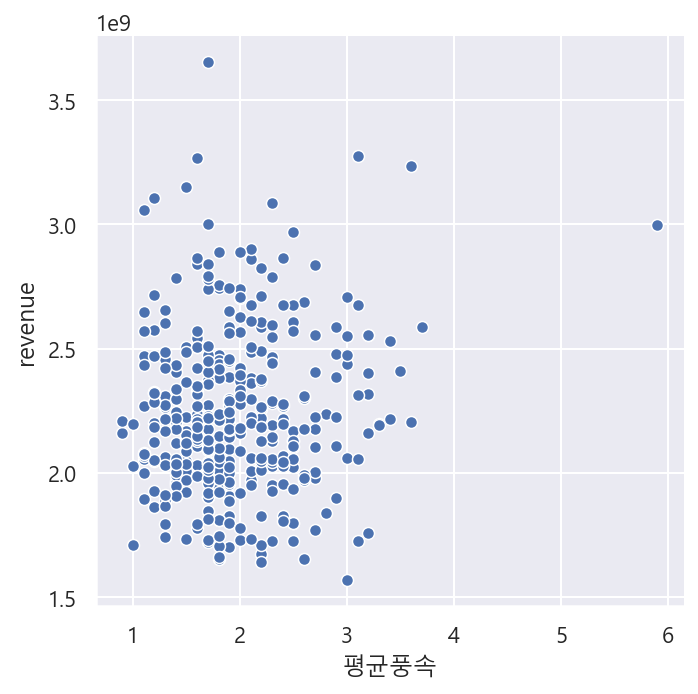

In [40]:
# 평균풍속 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='평균풍속', y='revenue')

### 산점도로는 확인 어려운 이유 : 바람이 그렇게 강하게 부는 날이 많지 않다...ㅋㅋㅋ
### 그래서 확실한건 풍속이 높으면 총수익이 높다는 추측은 가능하지만, 풍속이 높은 날이 많지 않아서 확실히하게 말하기는 어려울거 같다. 

## 일조시간 : 태양광선이 구름이나 안개 등에 의해서 차단되지 않고 지표면을 비춘 시간을 말한다. 

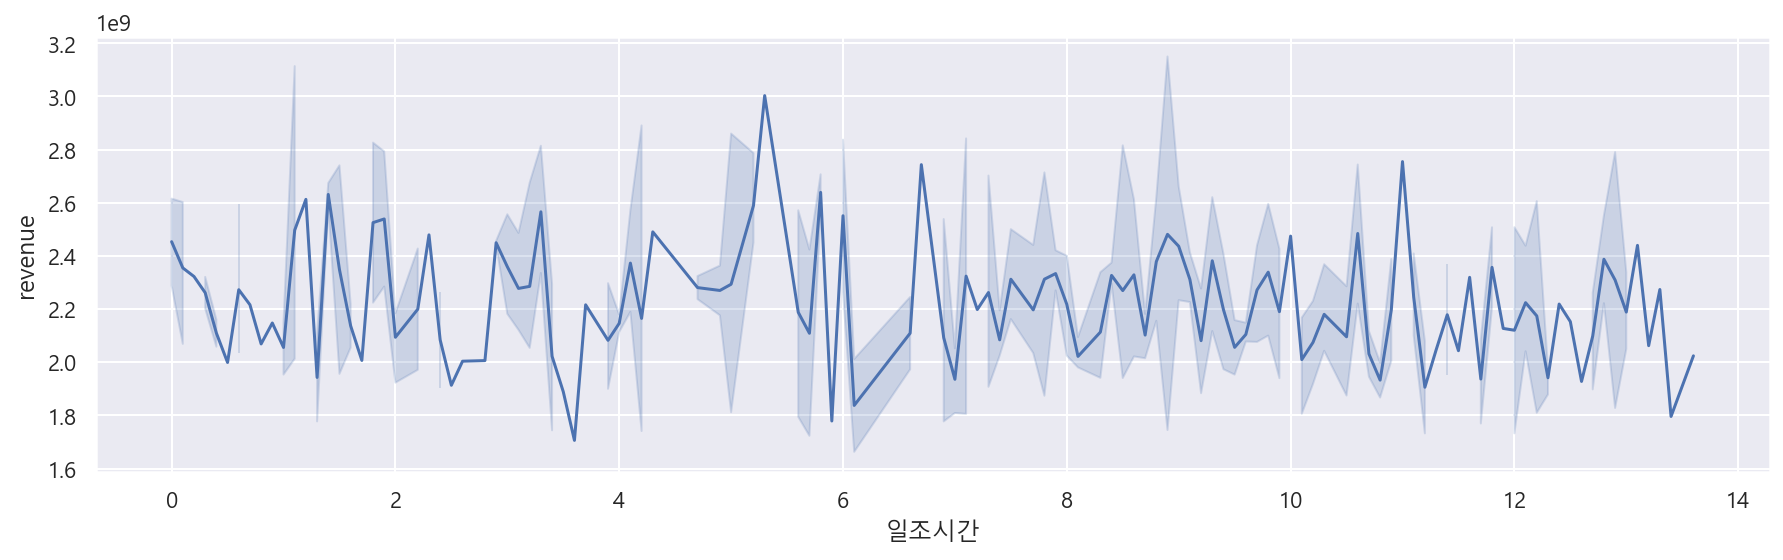

In [41]:
# 일조시간 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='일조시간', y='revenue')

### 느낌이긴 한데 일조시간이 적을 수록 수익이 많은거 같은??? 
### 어두워지면 일찍 들어가고 싶은 그런거 아닐까?? 추측

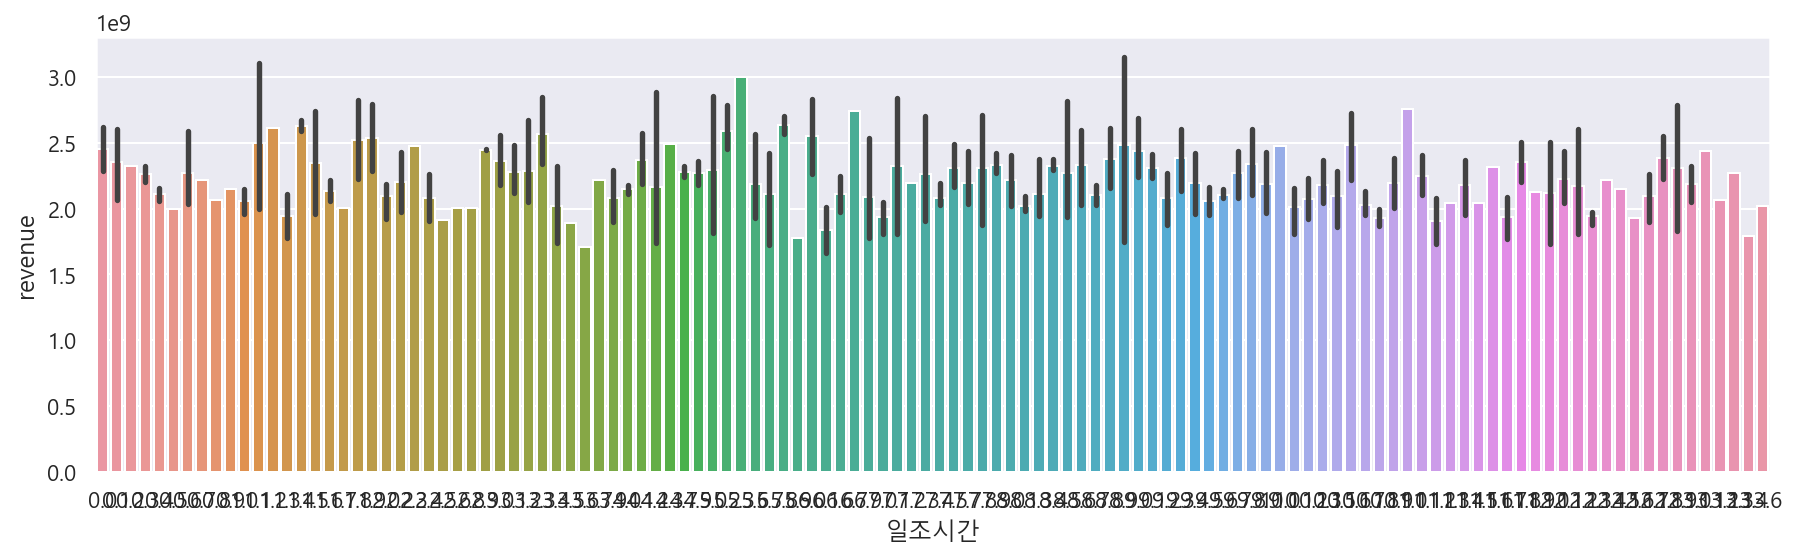

In [42]:
# 일조시간 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='일조시간', y='revenue')

### 아닌거 같기도....
### 분기별도 궁금하다... 할게 많아지네...

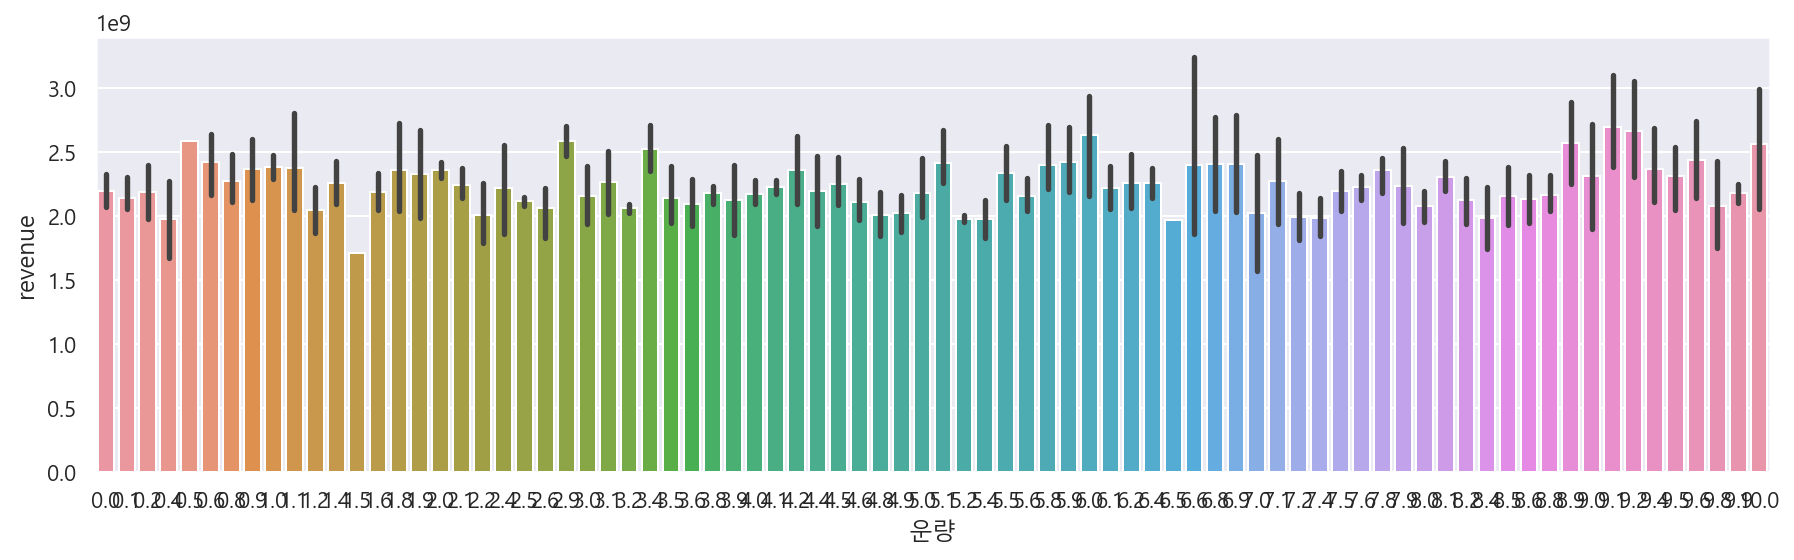

In [43]:
# 운량 x revenue
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='운량', y='revenue')

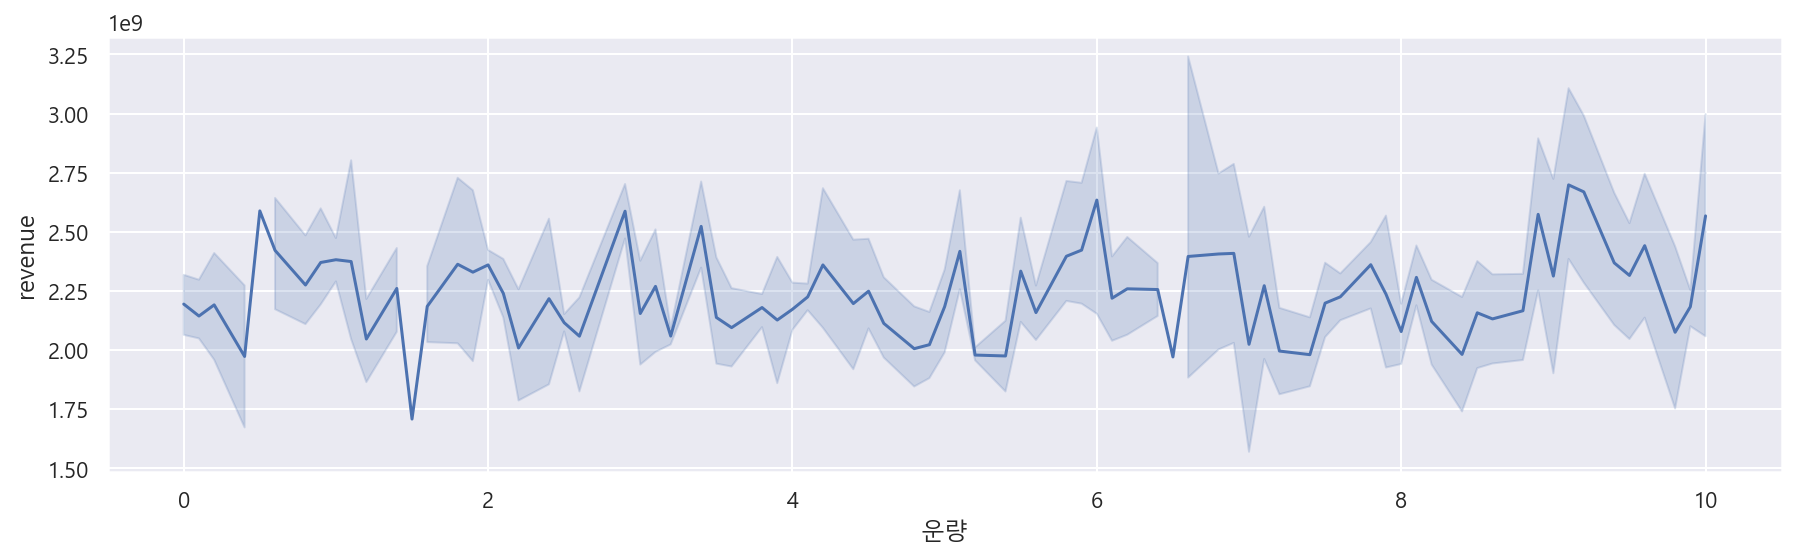

In [44]:
# 운량 x revenue
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='운량', y='revenue')

<Figure size 1080x288 with 0 Axes>

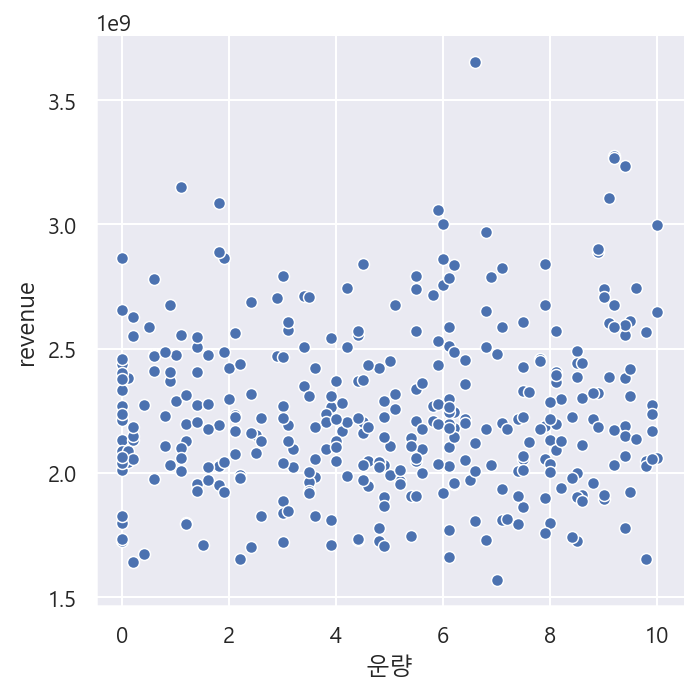

In [45]:
# 운량 x revenue
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='운량', y='revenue')

###  일조량과 연결되는 것 같은데? 둘중 하나만 쓰면 될거 같은 느낌이긴 한데 운량이 높으면 총수익이 높아진다. 
### 당연한 이야기지만 구름이 많으면 일조시간이 적으니깐 이런 결과가 나온거겠지?

## count - revenue는 판매가가 높아서 높은 금액이 나왔을지 모르니깐 개수로 확인해보자!!

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


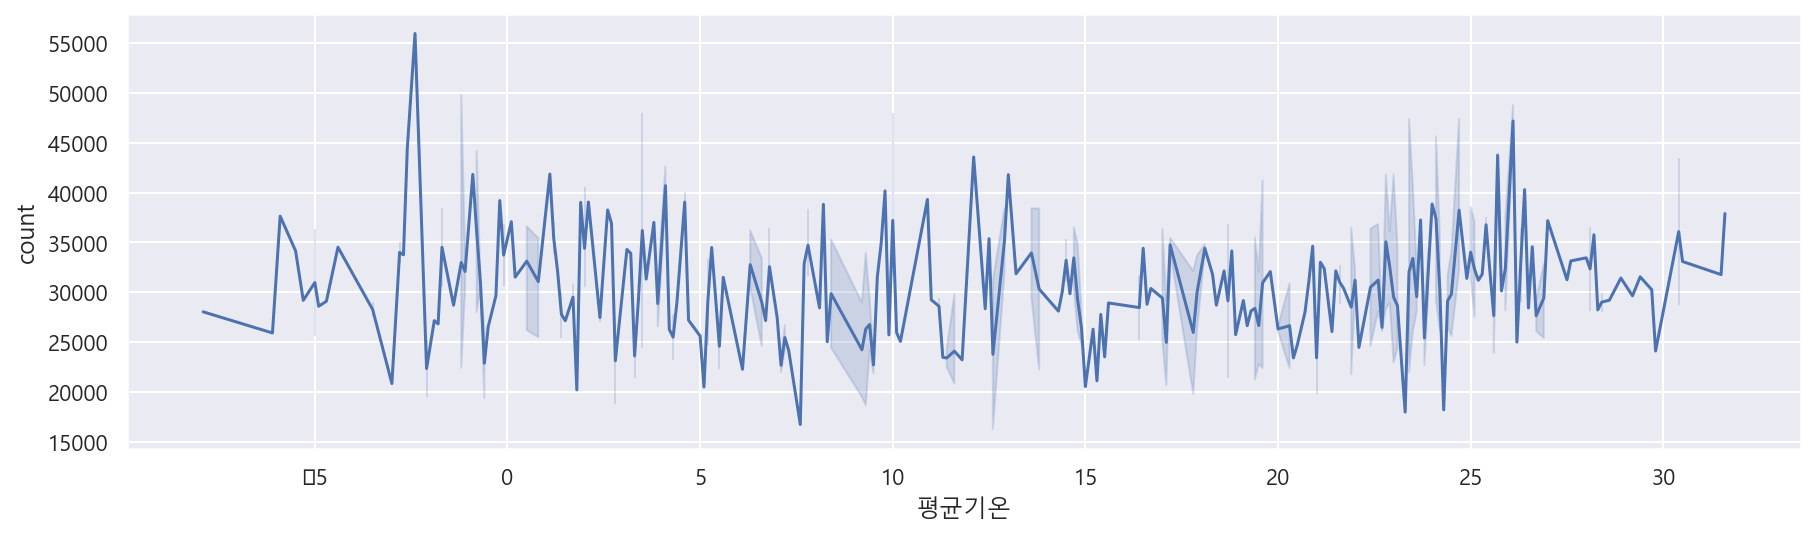

In [52]:
# 평균기온 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='평균기온', y='count')

### 역시?? 인가??? 개수로는 거의 비슷하거나 온도가 적기도하고 아주 높기도 하네..

### 기온이 낮을 떄는 왔다갔다가 심하다... 흠 그렇군

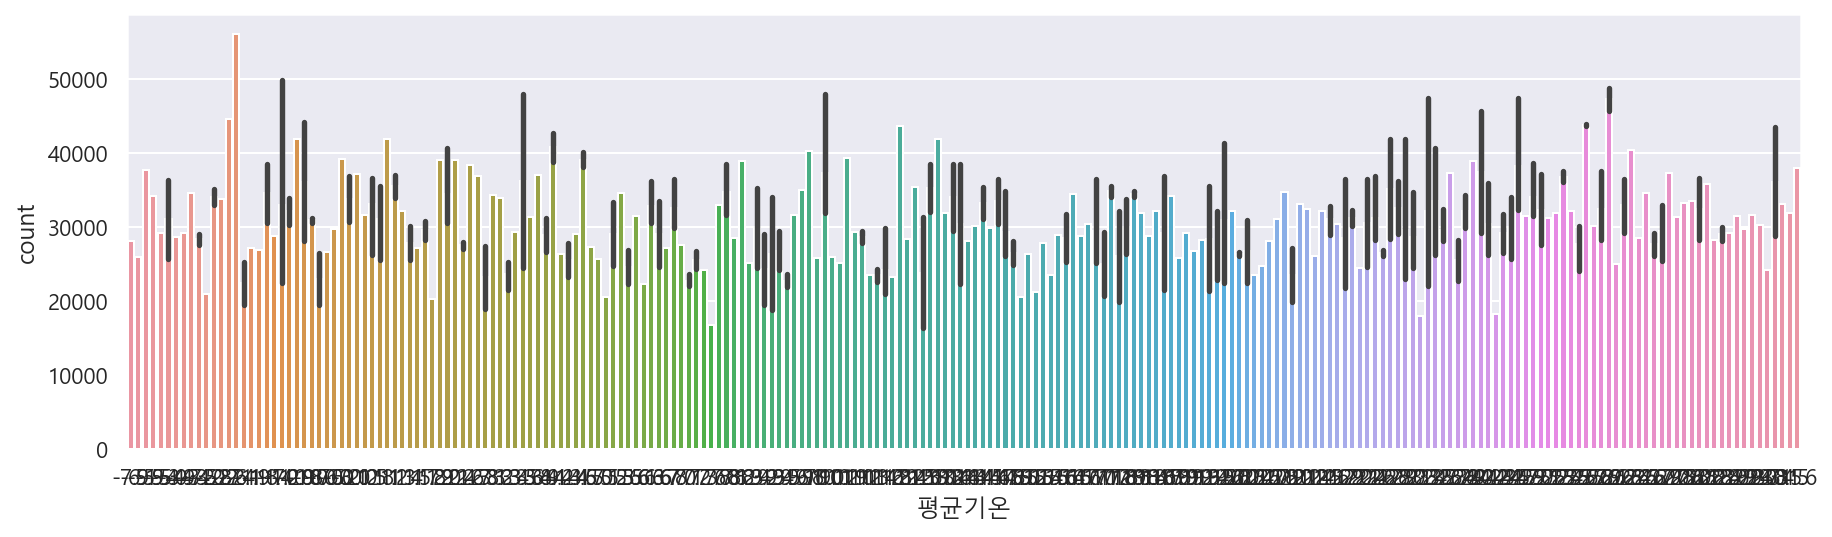

In [54]:
# 평균기온 x count - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='평균기온', y='count')

### 확실히 하루! 빠짝 높은거 말고는 비슷한 개수를 판매한거 같다.

### 그렇다면 역시 겨울철 물품들이 비싸다!!!

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 1080x288 with 0 Axes>

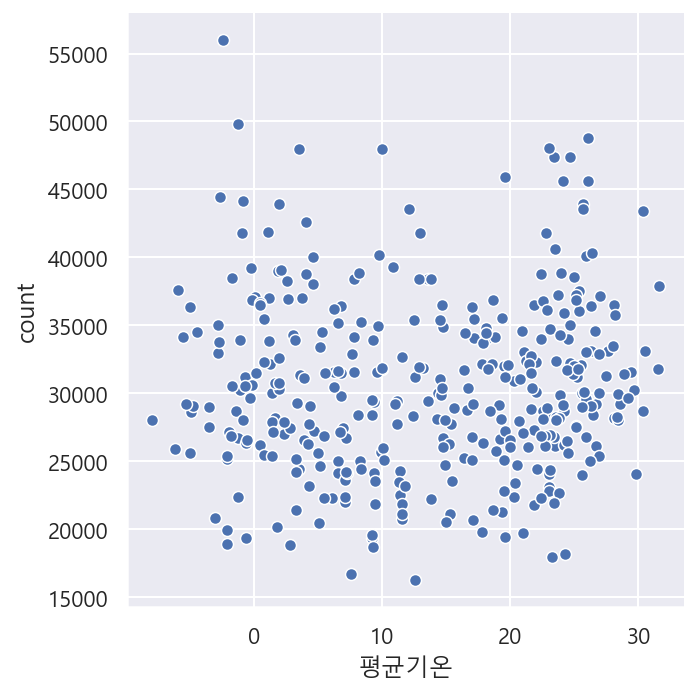

In [55]:
# 평균기온 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='평균기온', y='count')

### 산점도로 확인 했을 때 온도가 낮을 떄와 높을 떄는 큰 차이를 보이지 않는다. 

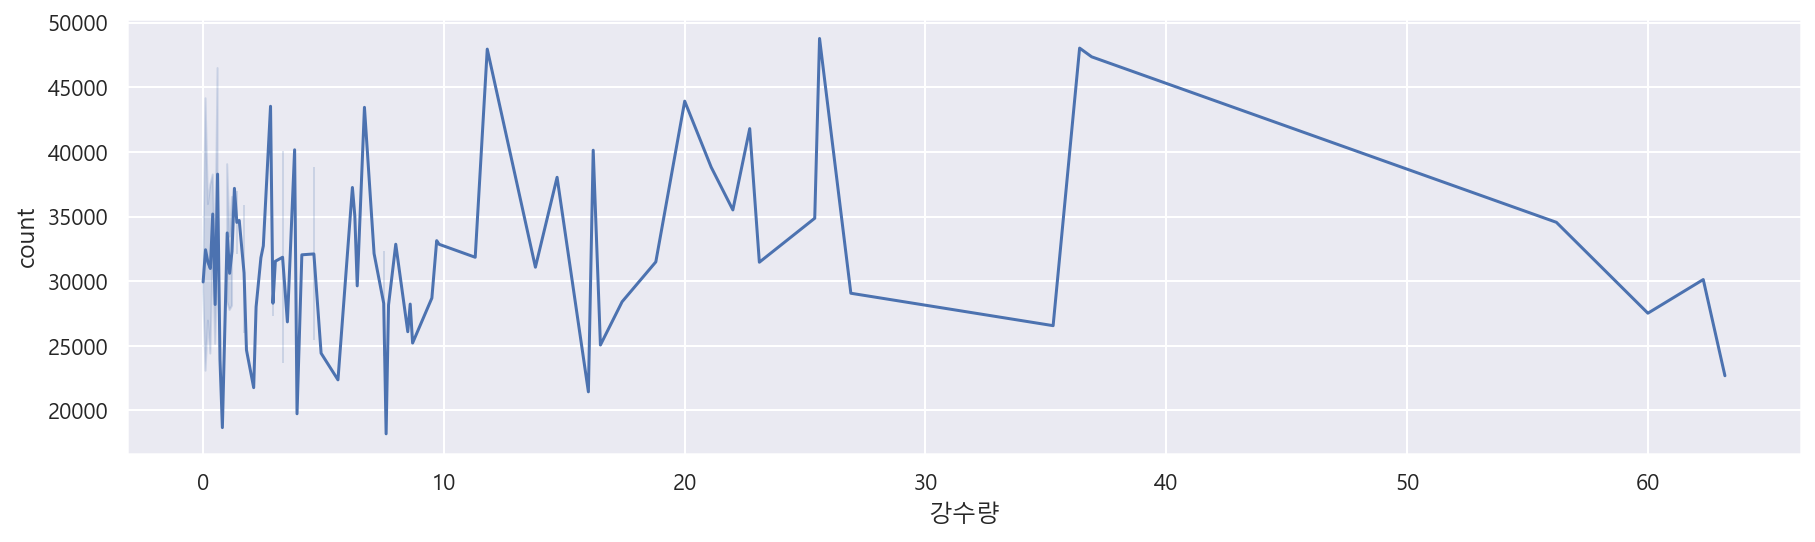

In [57]:
# 강수량 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='강수량', y='count')

### 강수량과의 관계는 모르겠다... 비가 적당히 올 떄가 많은 판매 개수를 보인다. 

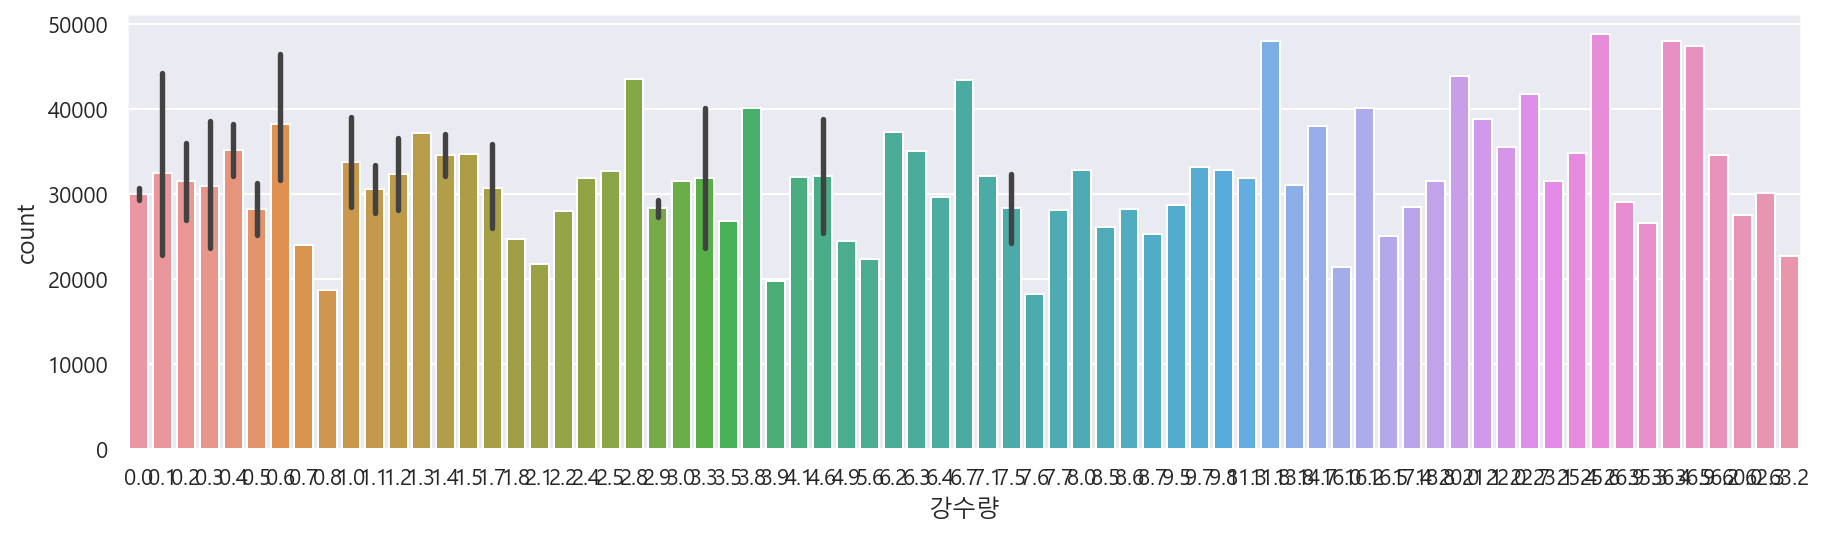

In [58]:
# 강수량 x count - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='강수량', y='count')

### 오??? 비가 많이 올 떄가 개수는 조금은 더 높은 것을 확인 할 수 있다??!!!!
### 여름의 물품들이 판매가가 낮아서 자세히 그 차이를 몰랐던 것일 수 있을 것 같다!!

<Figure size 1080x288 with 0 Axes>

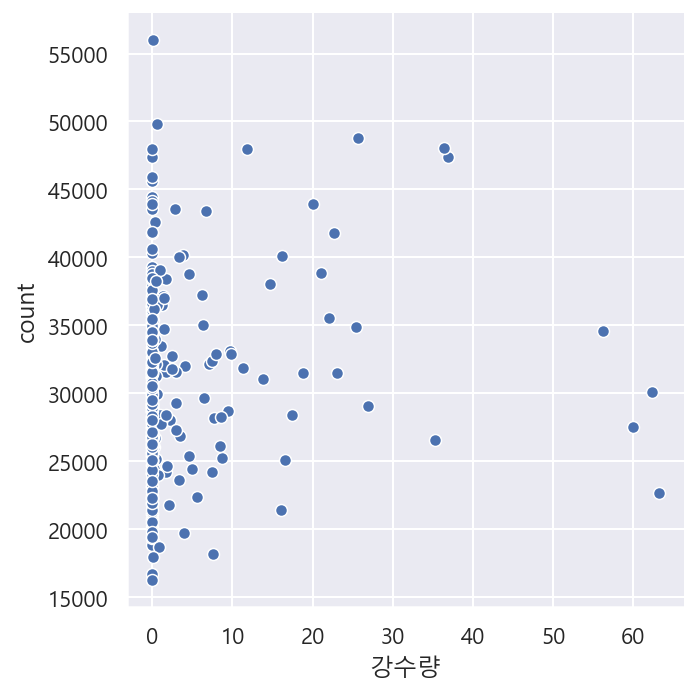

In [59]:
# 강수량 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='강수량', y='count')

### 산점도로 보게 되면 어떤게 정확한지 확신 할 수 없네...

<Figure size 1080x360 with 0 Axes>

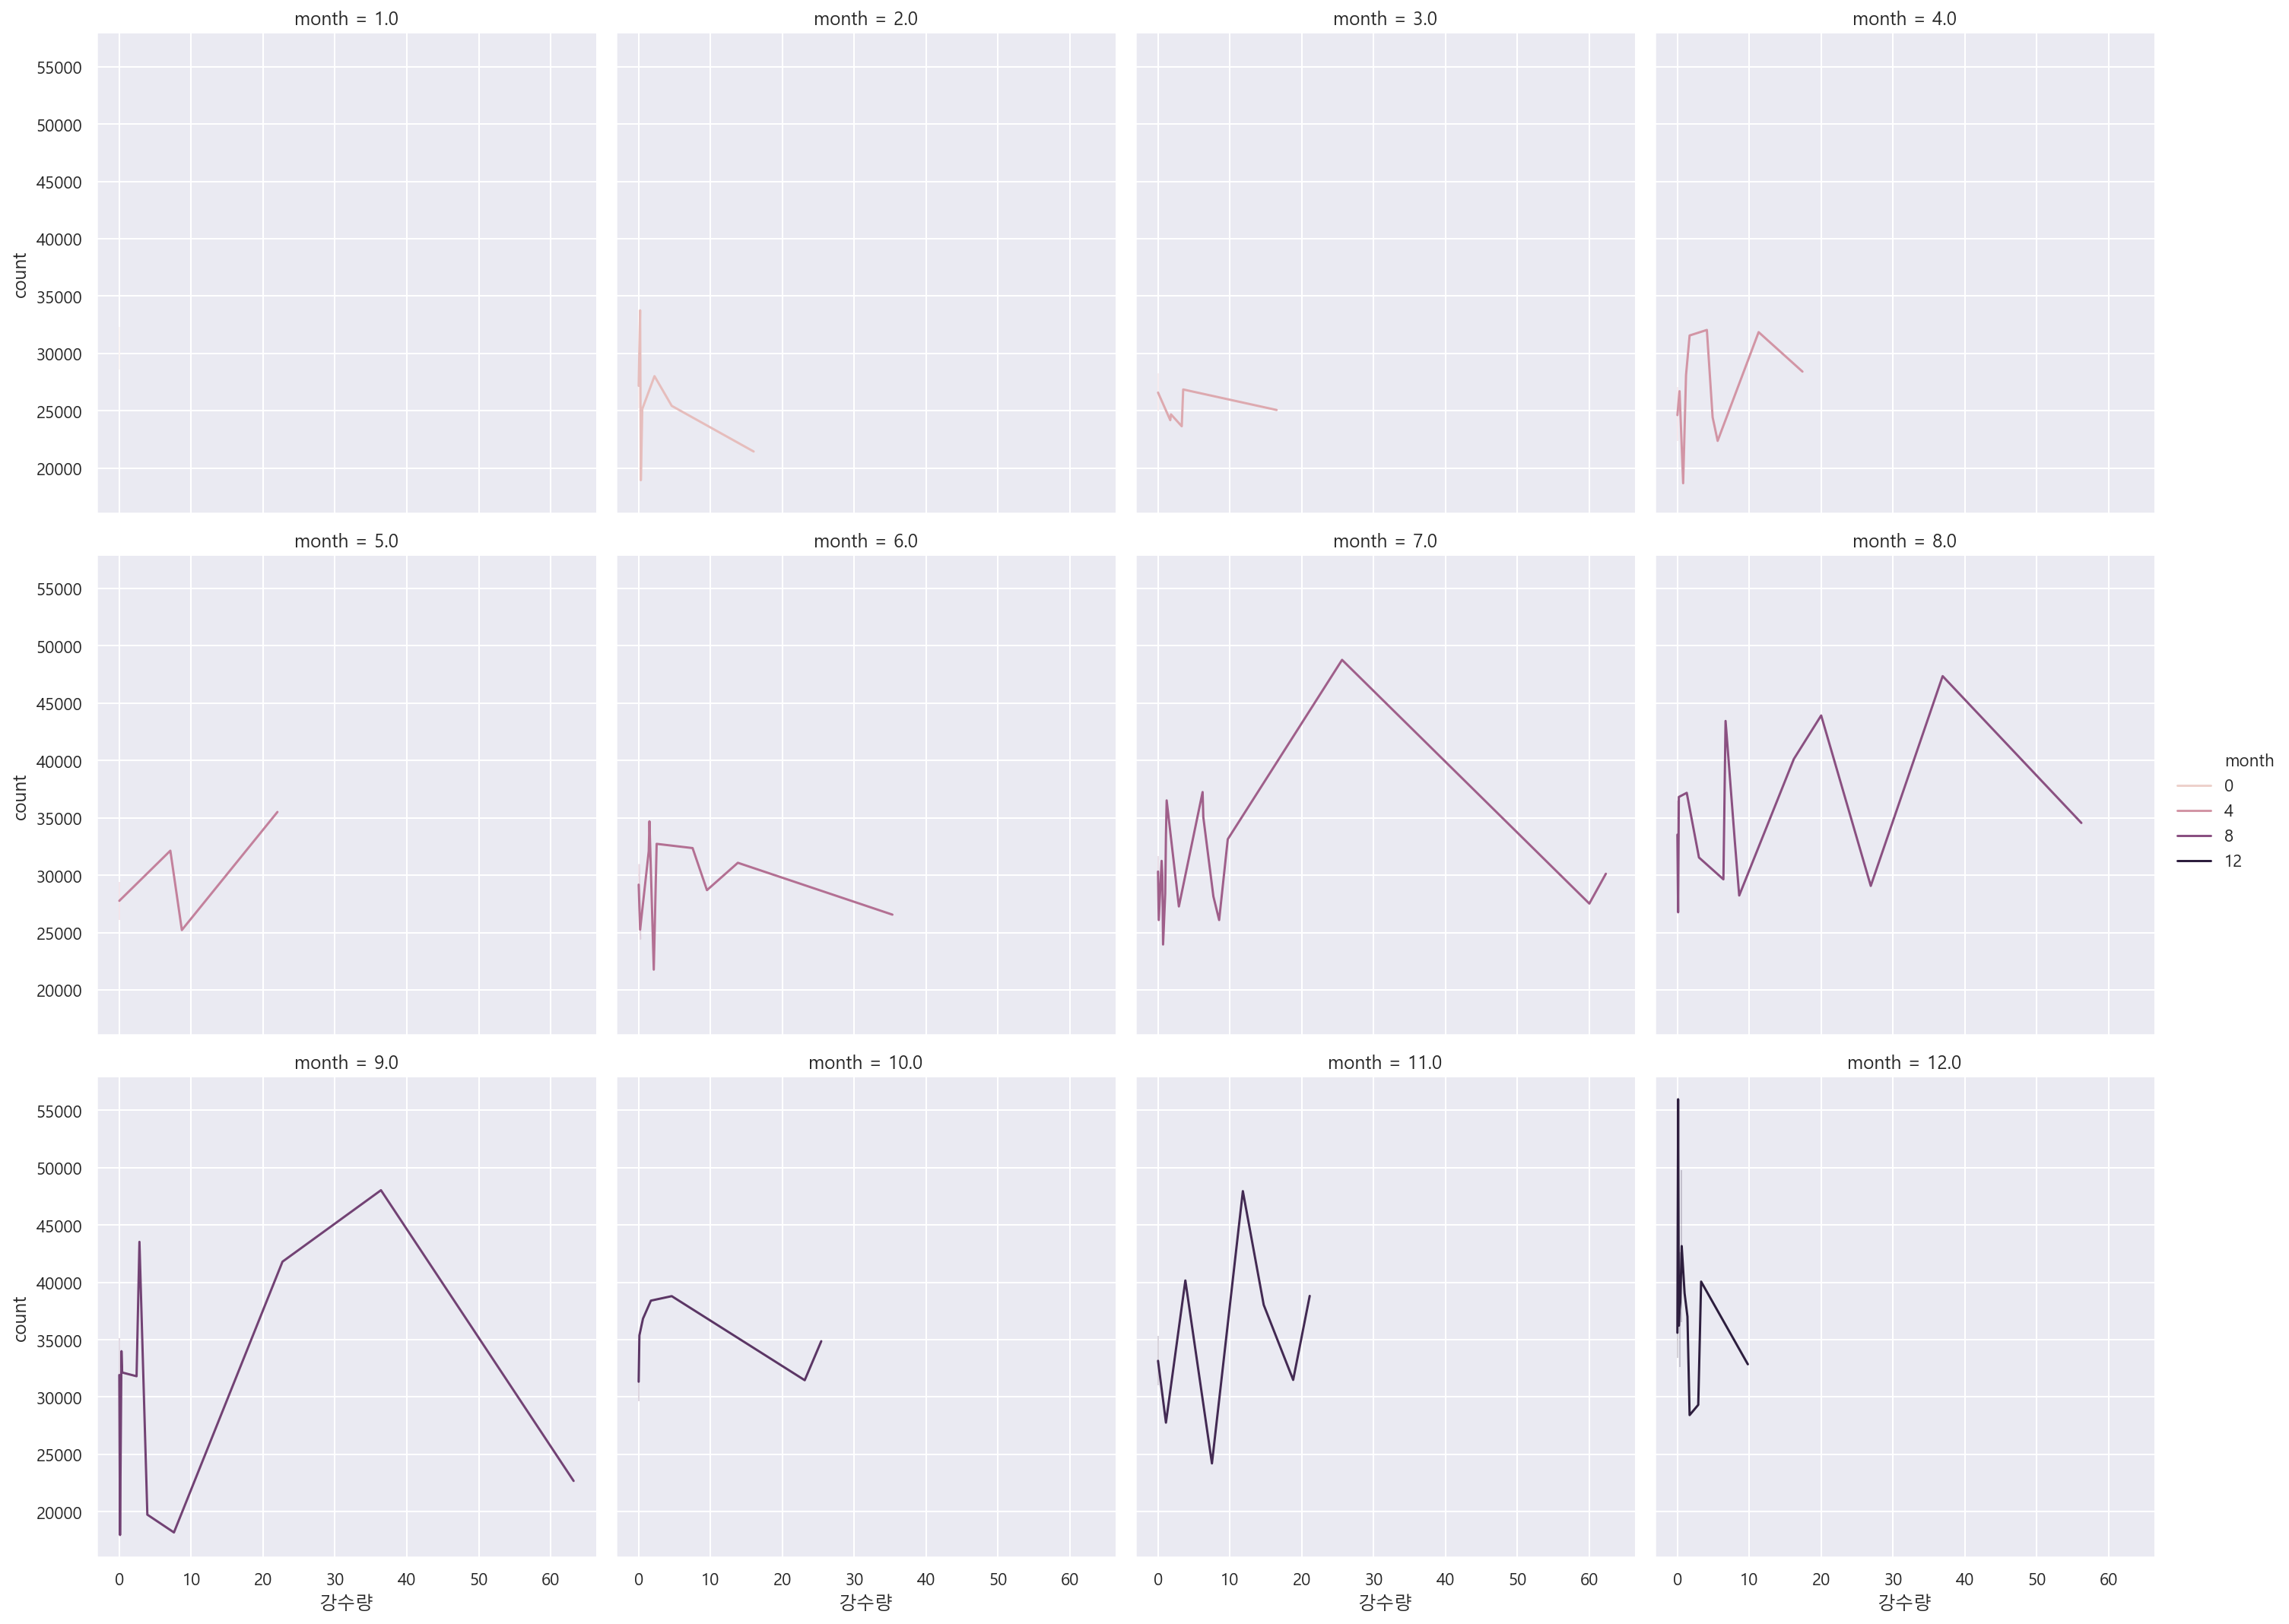

In [63]:
# 강수량 x count - 시각화 
plt.figure(figsize= (15,5))
sns.relplot(data = ns, x = '강수량' ,y = 'count', kind = 'line', hue = 'month', col = 'month', col_wrap=4)

### 피드백 부탁드립니다!!! 

### 강수량은 의미가 있을거 같은데 어떻게 있다고 말하기 참 어렵습니다. 

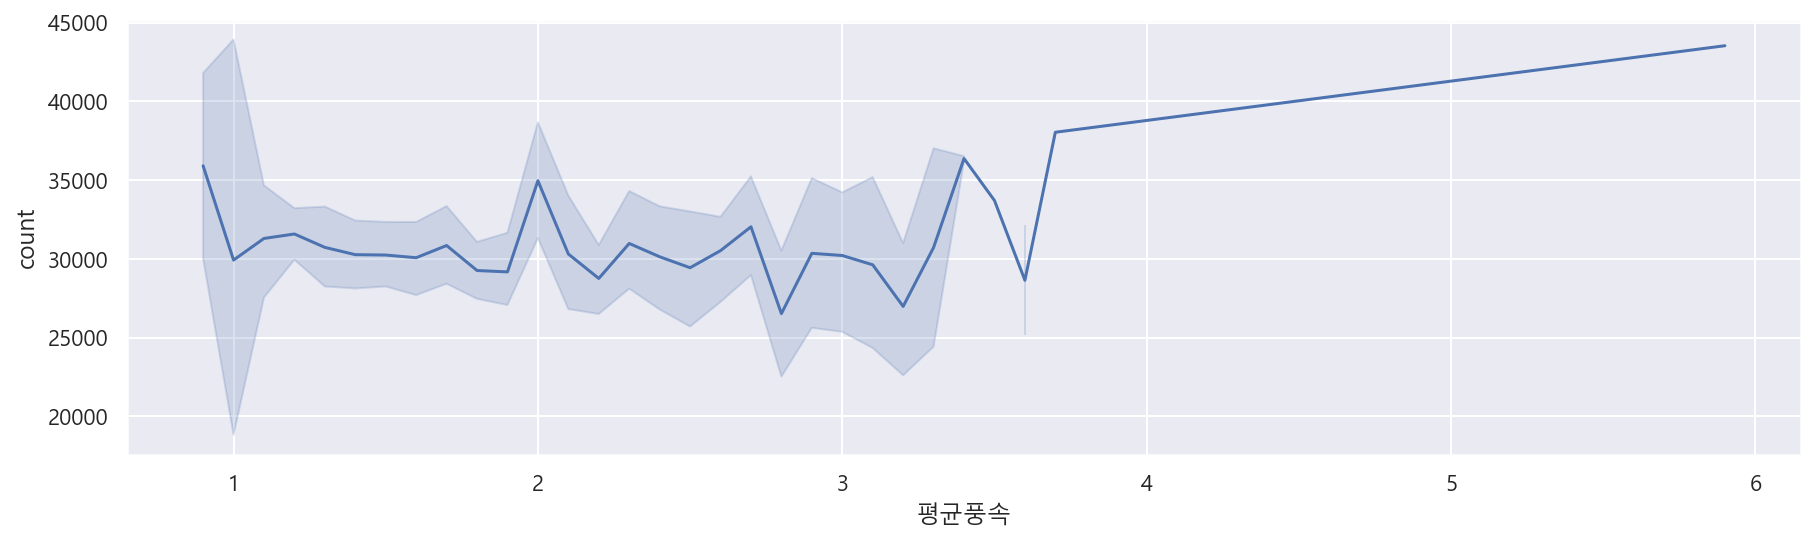

In [66]:
# 평균풍속 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='평균풍속', y='count')

### 풍속이 높을수록 높은 판매 개수를 보인다. 

### revenue가 그랬듯 평균속은 확실히 연결되는 부분인거 같다

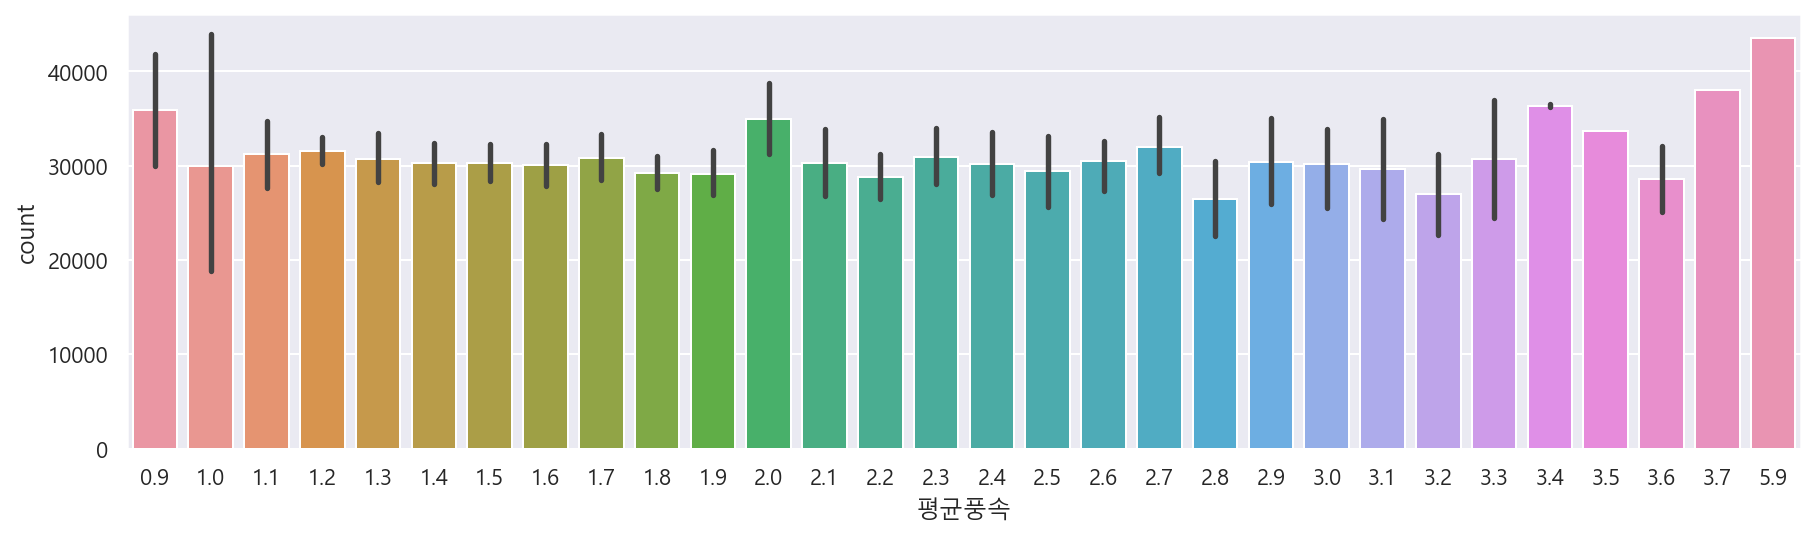

In [67]:
# 평균풍속 x count - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='평균풍속', y='count')

### 추가적으로 이야기하면 강한 바람일 때, 높은 판매량을 보인다고 할 수 있을것 같다

<Figure size 1080x288 with 0 Axes>

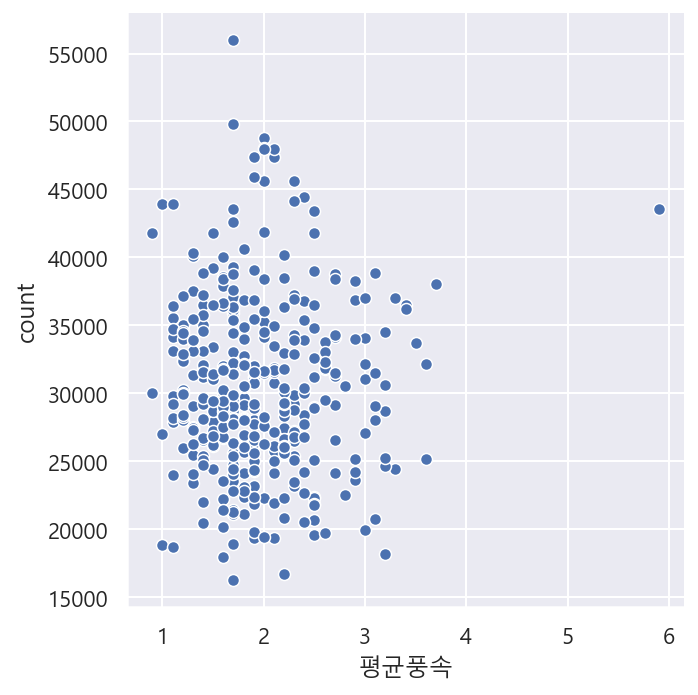

In [68]:
# 평균풍속 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='평균풍속', y='count')

### 산점도로 확인 했들 때는 그렇게 많은 연관이 되는것 같아 보이지는 않지만 평균 바람이 높을 때가 많지 않기 때문이라고 판단 된다. 

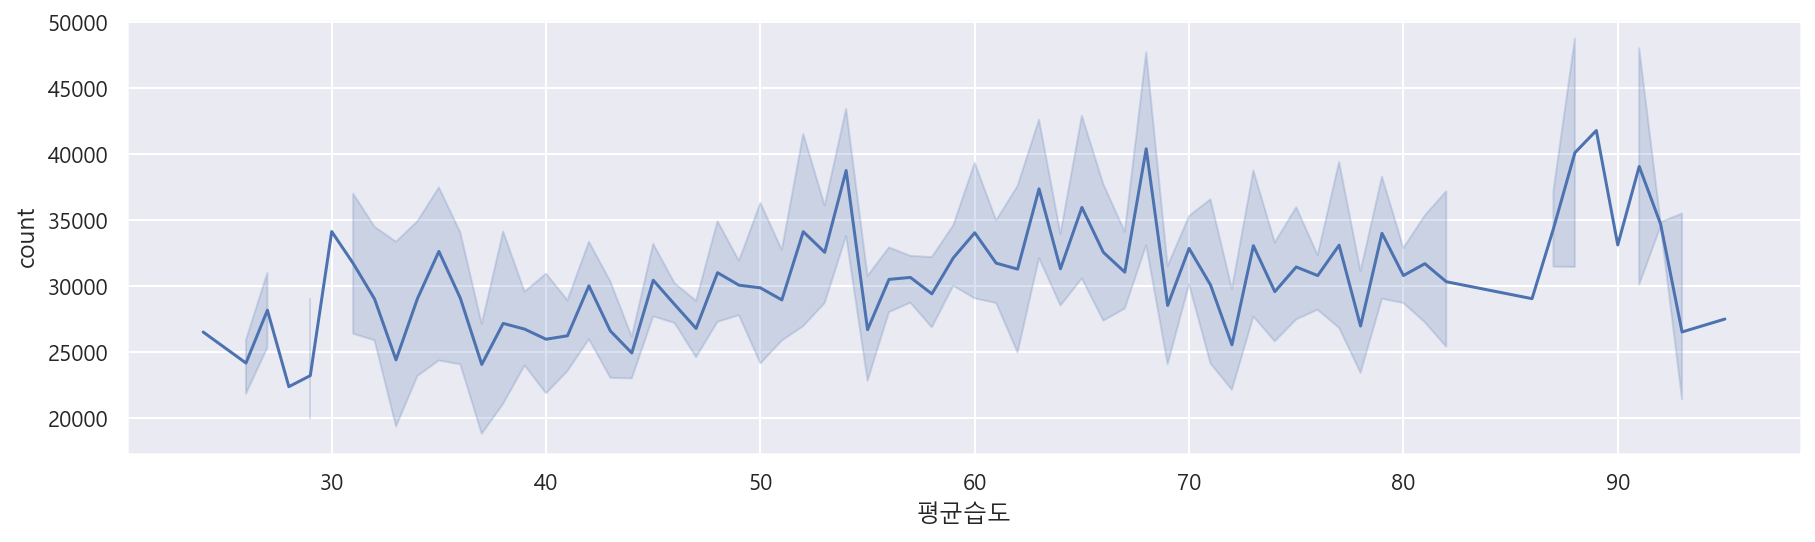

In [49]:
# 평균습도 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='평균습도', y='count')

<Figure size 1080x288 with 0 Axes>

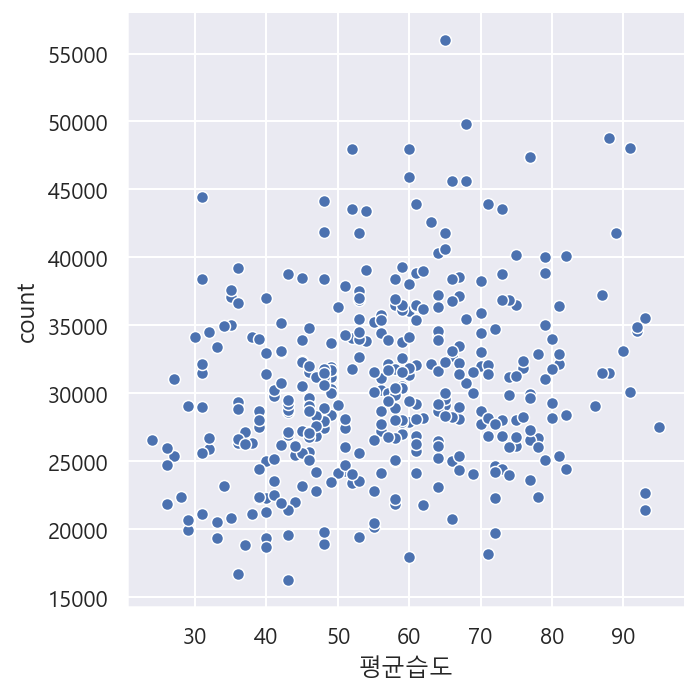

In [50]:
# 평균습도 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='평균습도', y='count')

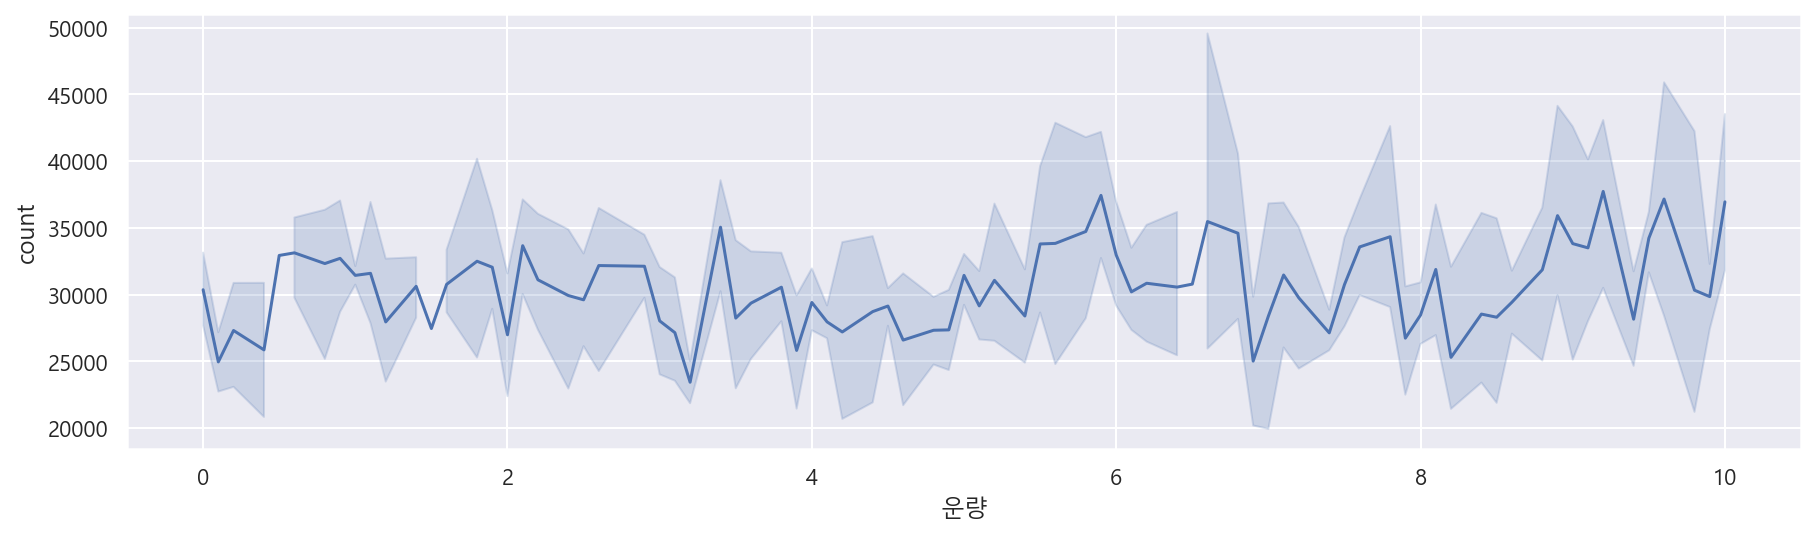

In [69]:
# 운량 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='운량', y='count')

### 수익과 동일하게 판매량도 운량이 많을 수록 높게 나타난다. 

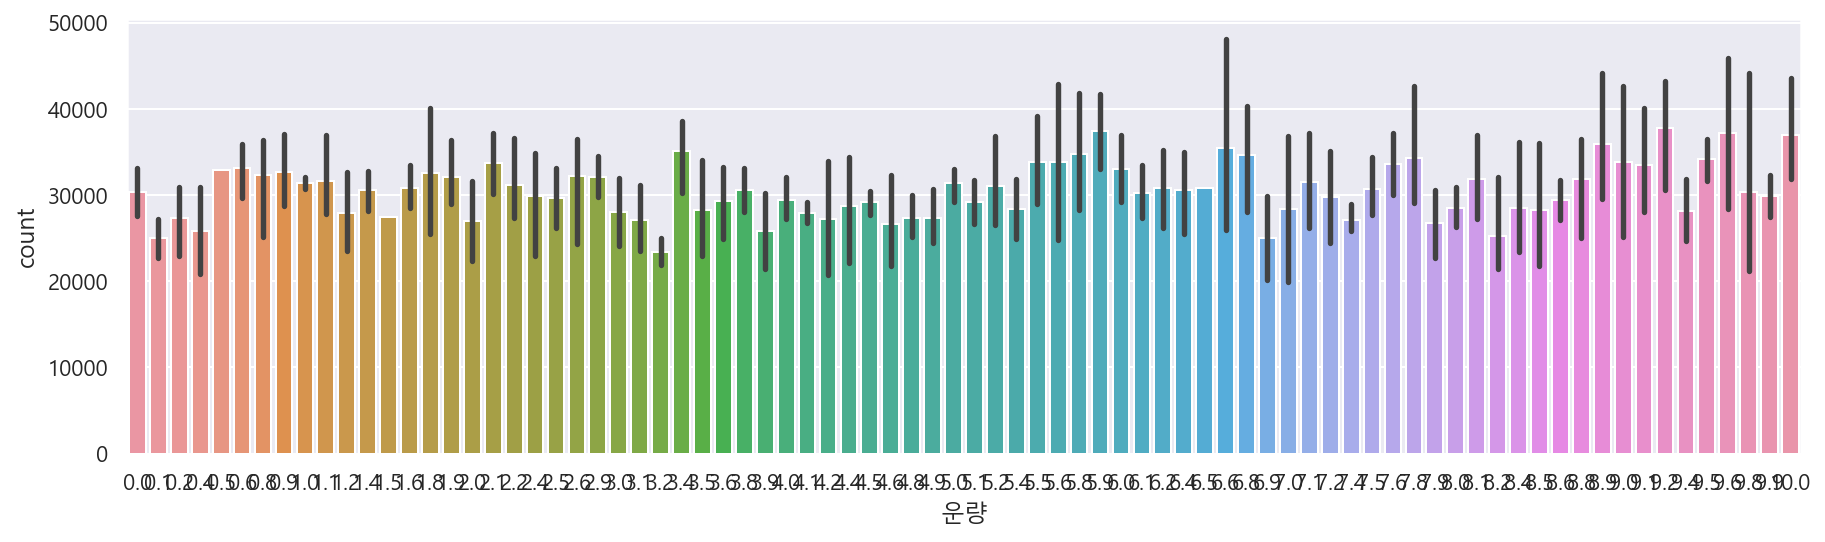

In [70]:
# 운량 x count - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='운량', y='count')

### 애매하지만 평균적으로 운량이 높을 때 판매수량이 높을 것으로 추측한다. 

<Figure size 1080x288 with 0 Axes>

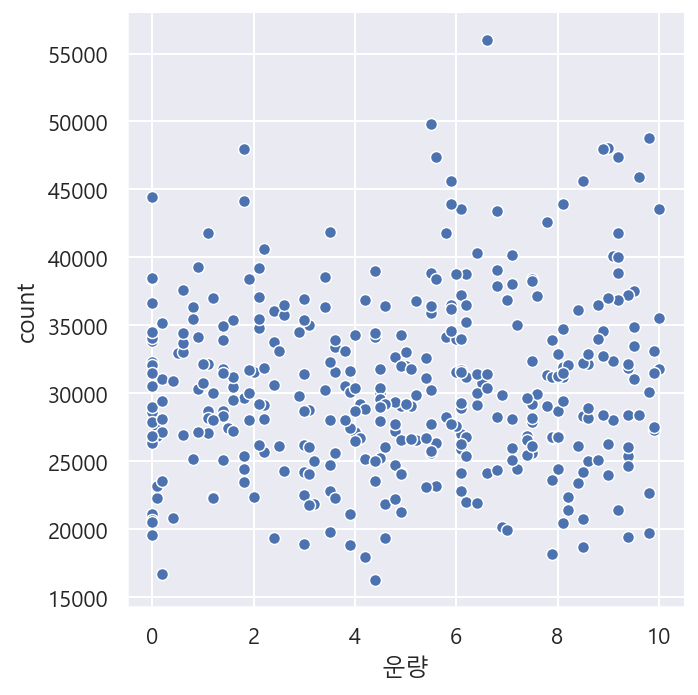

In [71]:
# 운량 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='운량', y='count')

### 산점도로 확인했을 때, count -  40000만을 넘어가는 것이 운량이 높을 떄 비교적 많이 보인다. 

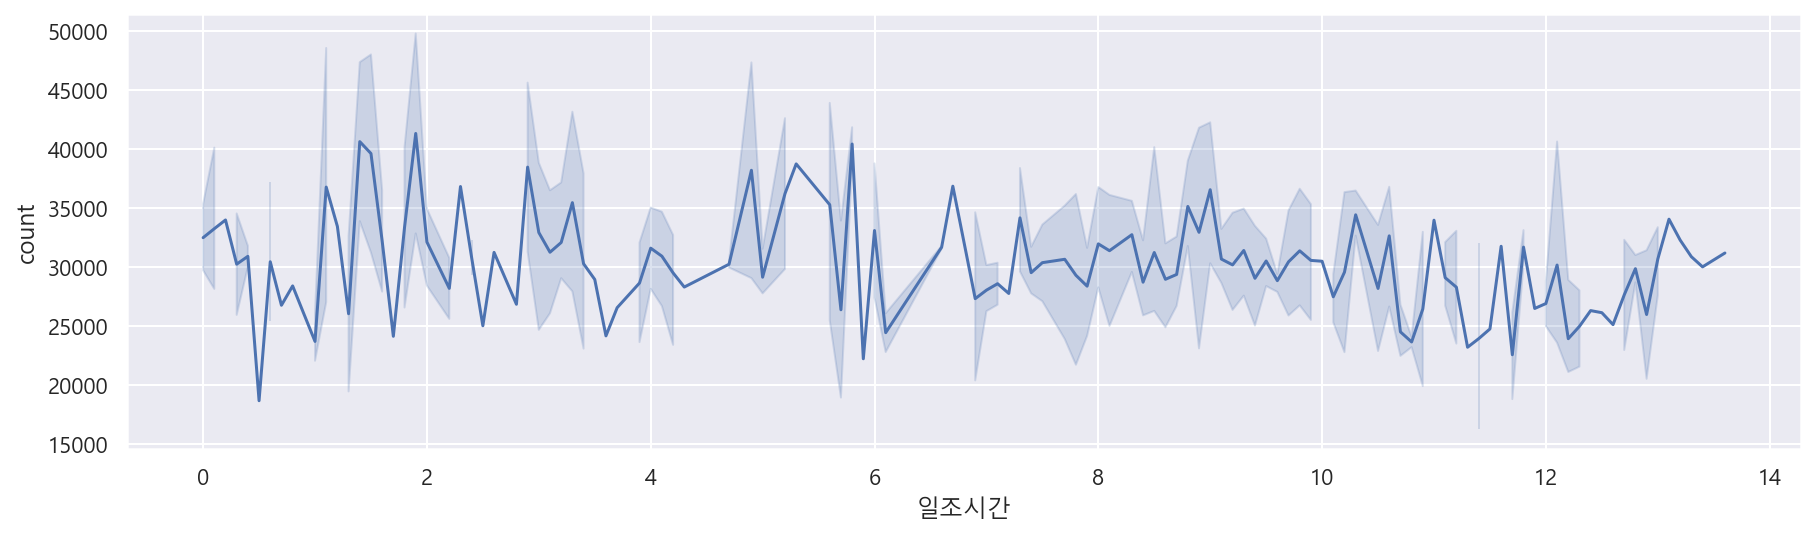

In [73]:
# 일조시간 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='일조시간', y='count')

### 개인적으로 일조시간은 운량과 반대되는 개념으로 운량만 사용하면 될거 같다. 

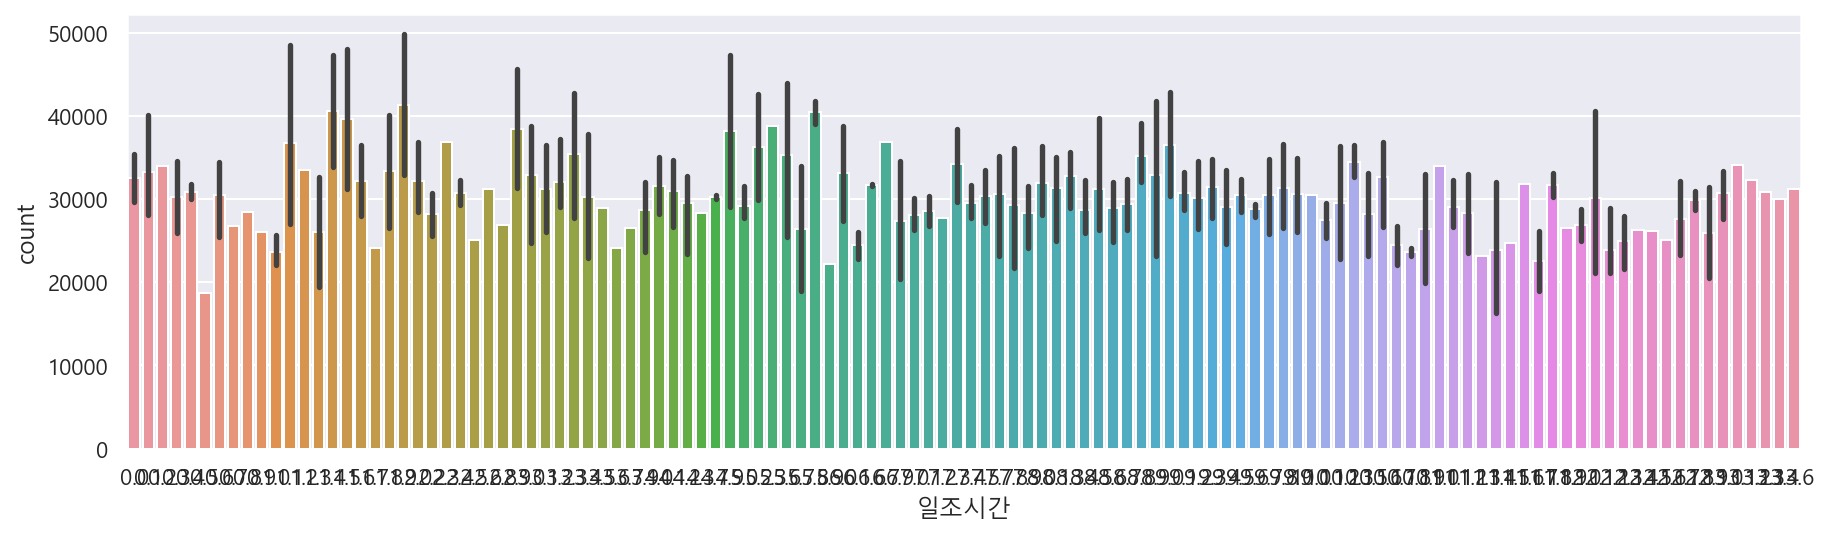

In [75]:
# 일조시간 x count - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='일조시간', y='count')

### 운량과 반대 되는 그래프가 나온다. 

<Figure size 1080x288 with 0 Axes>

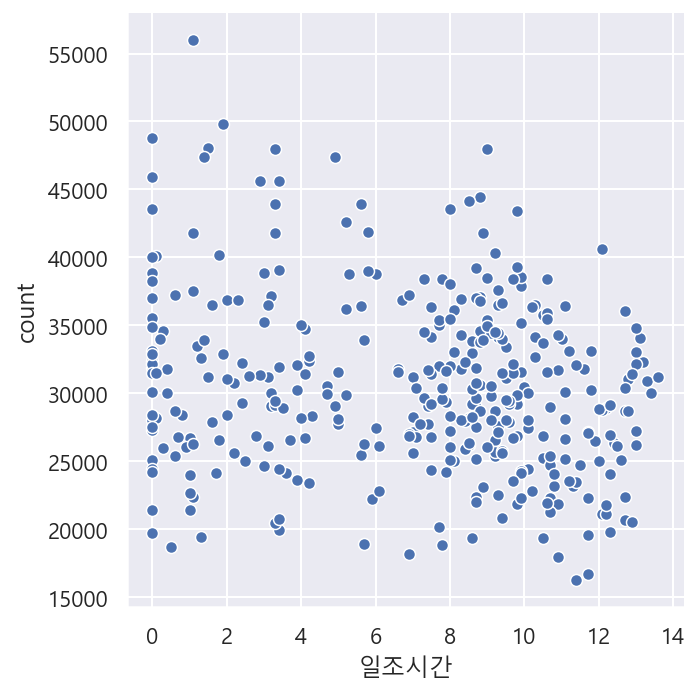

In [77]:
# 일조시간 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='일조시간', y='count')

### 동일하다. 

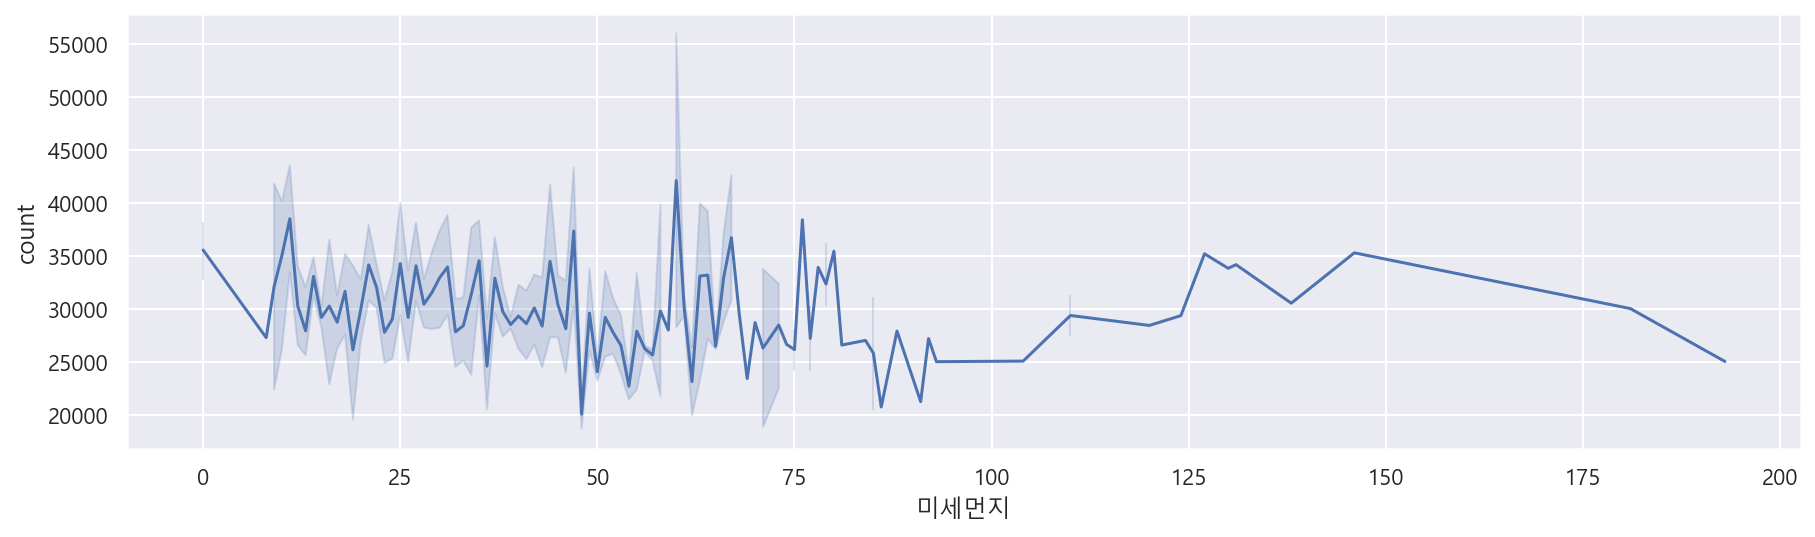

In [78]:
# 미세먼지 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='미세먼지', y='count')

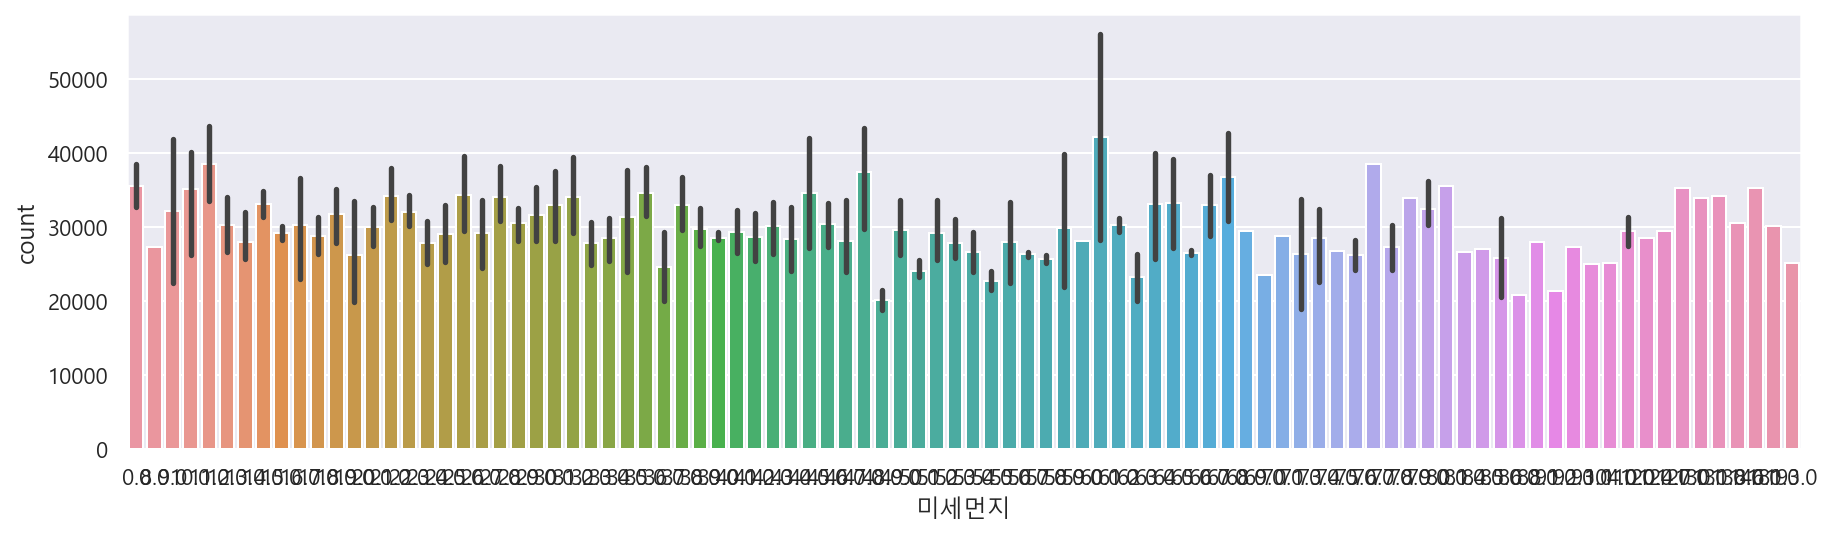

In [80]:
# 미세먼지 x count - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='미세먼지', y='count')

<Figure size 1080x288 with 0 Axes>

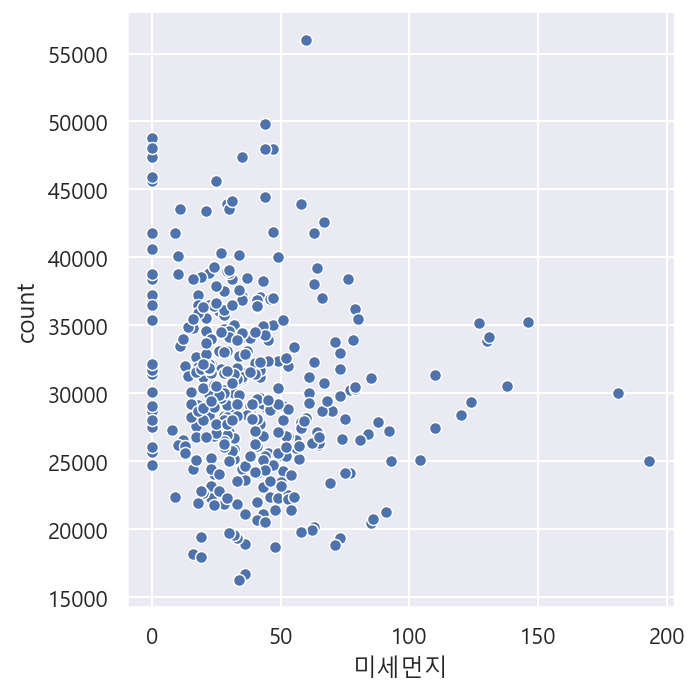

In [83]:
# 미세먼지 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='미세먼지', y='count')

### 개인적으로 가장 의미 없어 보이는 기후이다. 

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


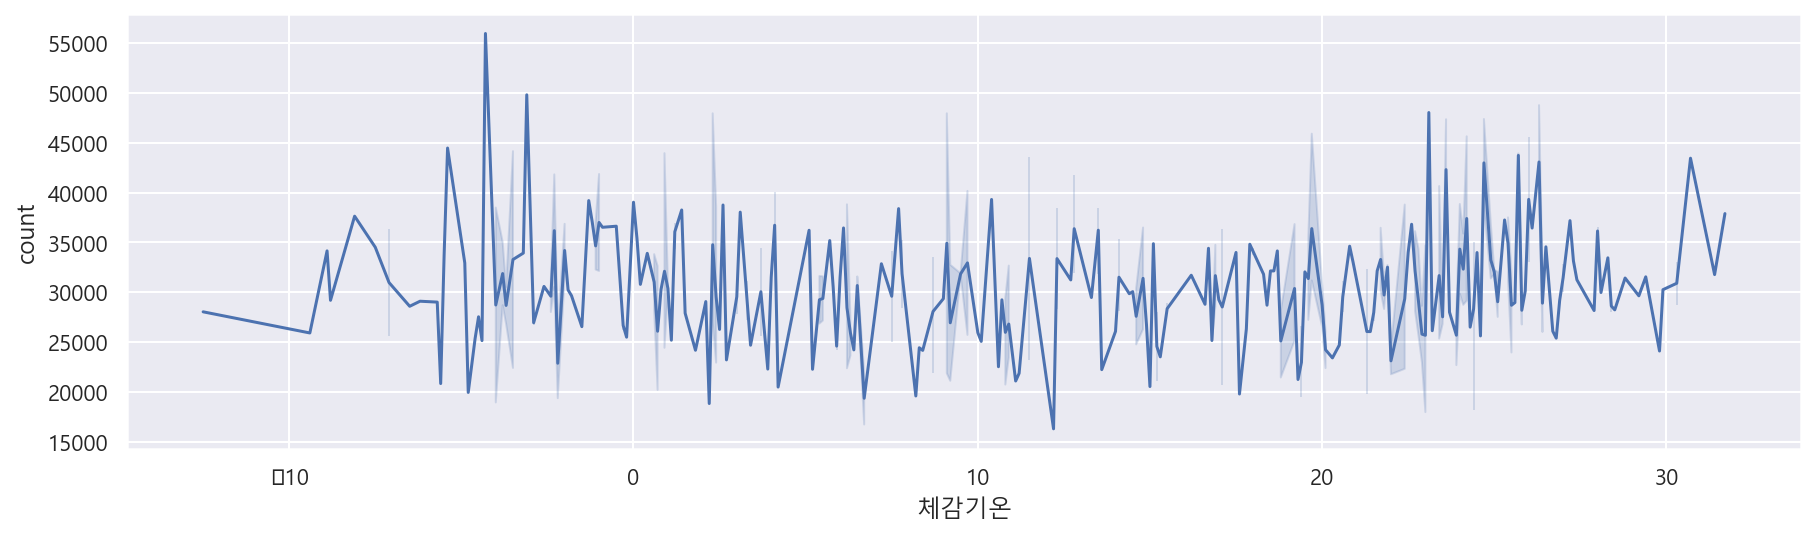

In [84]:
# 체감기온 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='체감기온', y='count')

### 기온과 비슷한 그래프를 보인다. 거의 동일한 것 같다. 변수가 너무 많다면 둘중에 하나만 쓴는 것도 나쁘지 않을듯 하다 

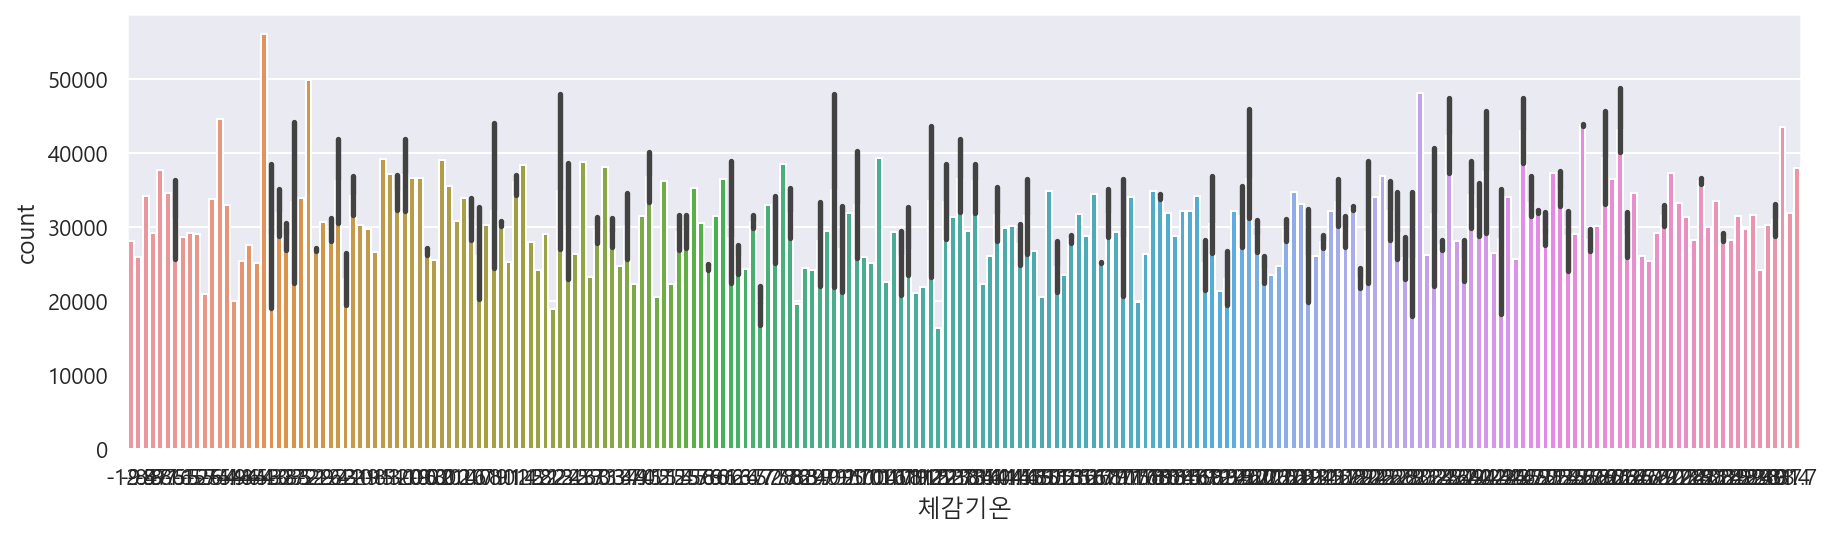

In [87]:
# 체감기온 x count - 시각화
plt.figure(figsize=(15,4))
sns.barplot(data=ns, x='체감기온', y='count')

### 평균기온 = 체감 기온

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 1080x288 with 0 Axes>

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


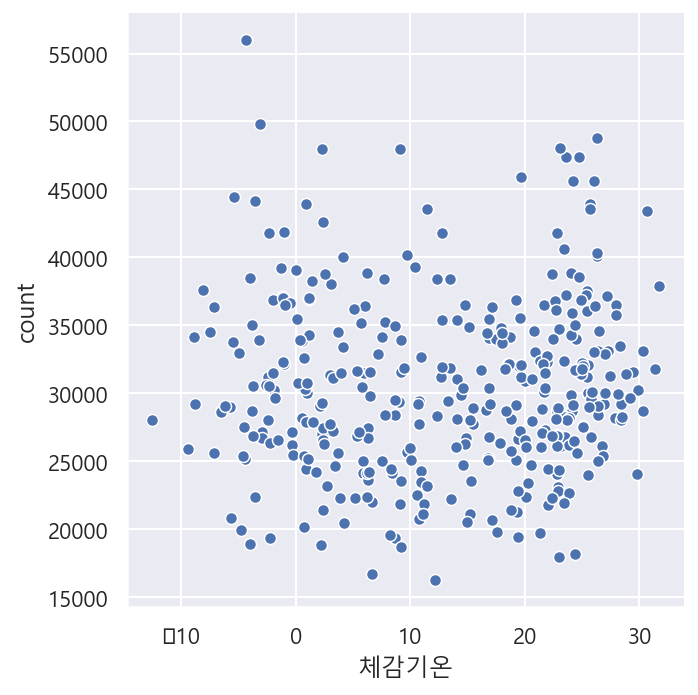

In [89]:
# 체감기온 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='체감기온', y='count')

### 평균 기온과 동일하게 이상치를 제외하면 판매량의 차이는 크지 않다는 생각이 든다. 

### category - 서울 평균기온, 강수량, 미세먼지, 평균습도, 평균풍속, 일조시간

In [99]:
ns = pd.merge(ns, weather)

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

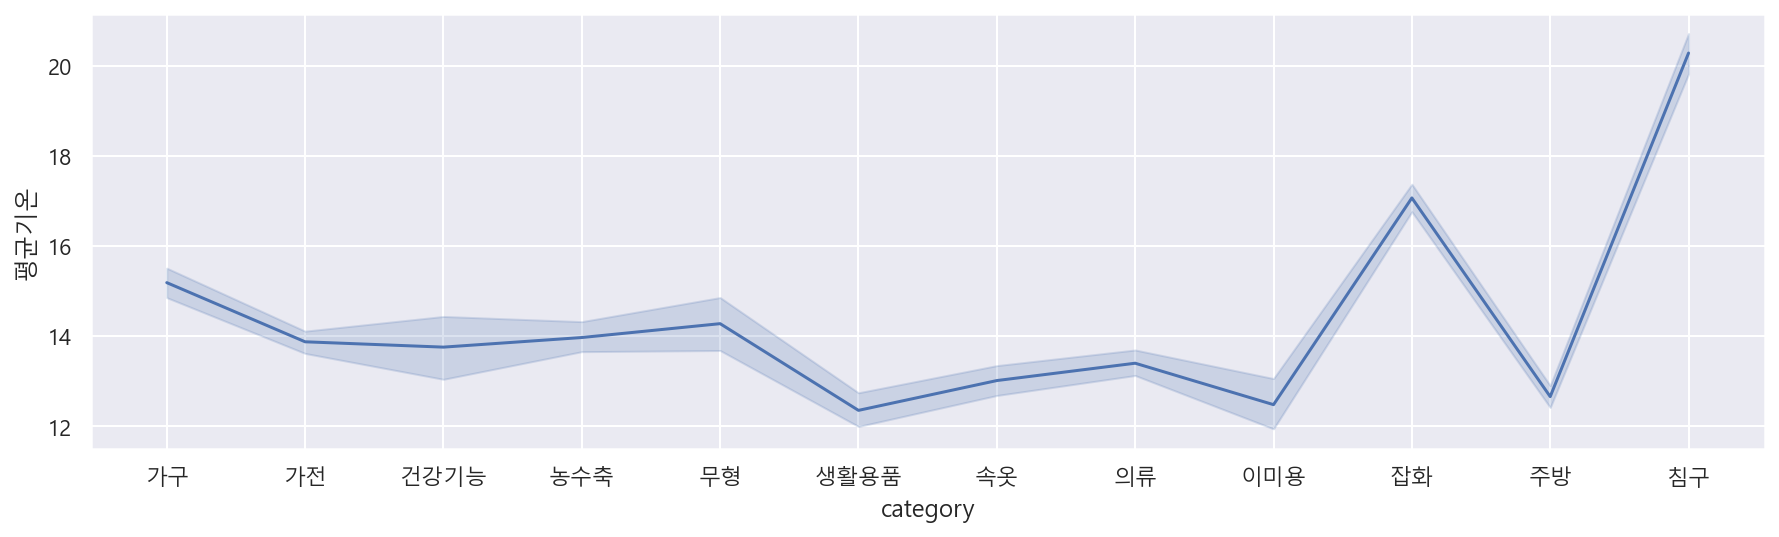

In [191]:
# 평균기온 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='평균기온')

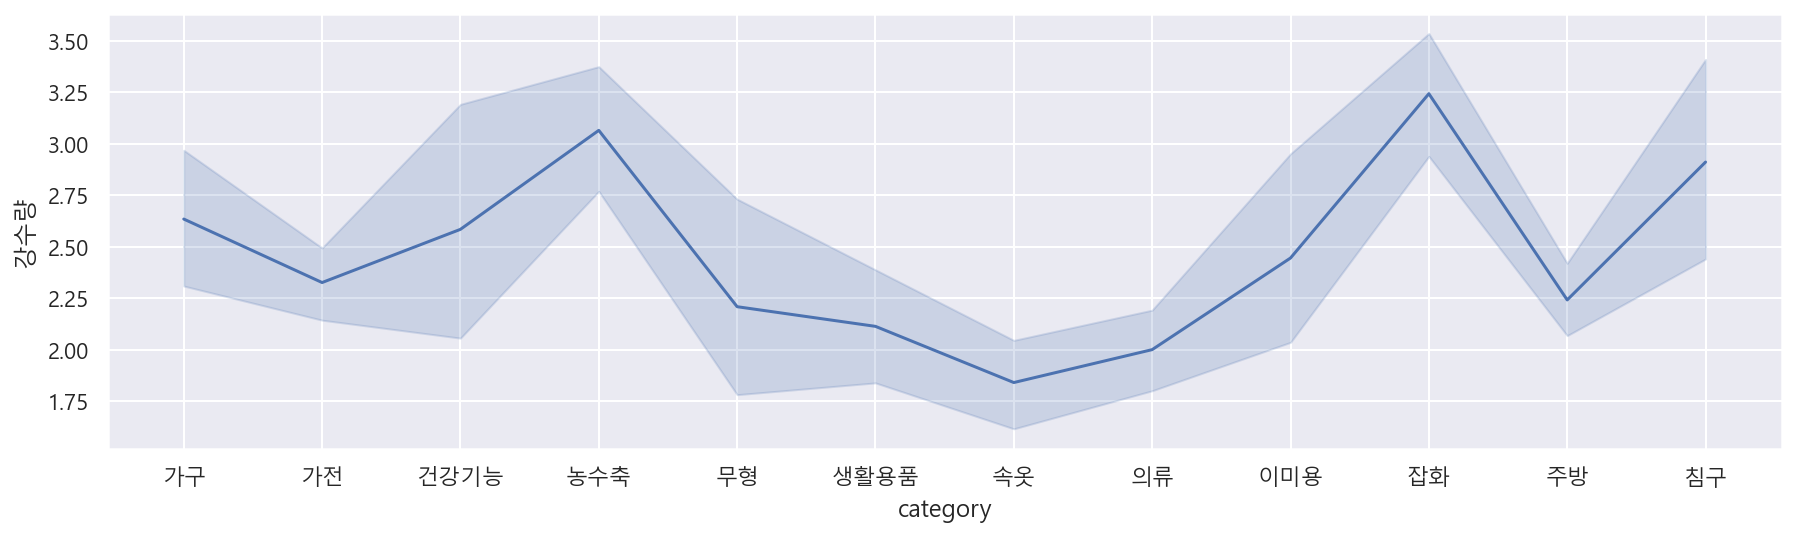

In [184]:
# 강수량 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='강수량')

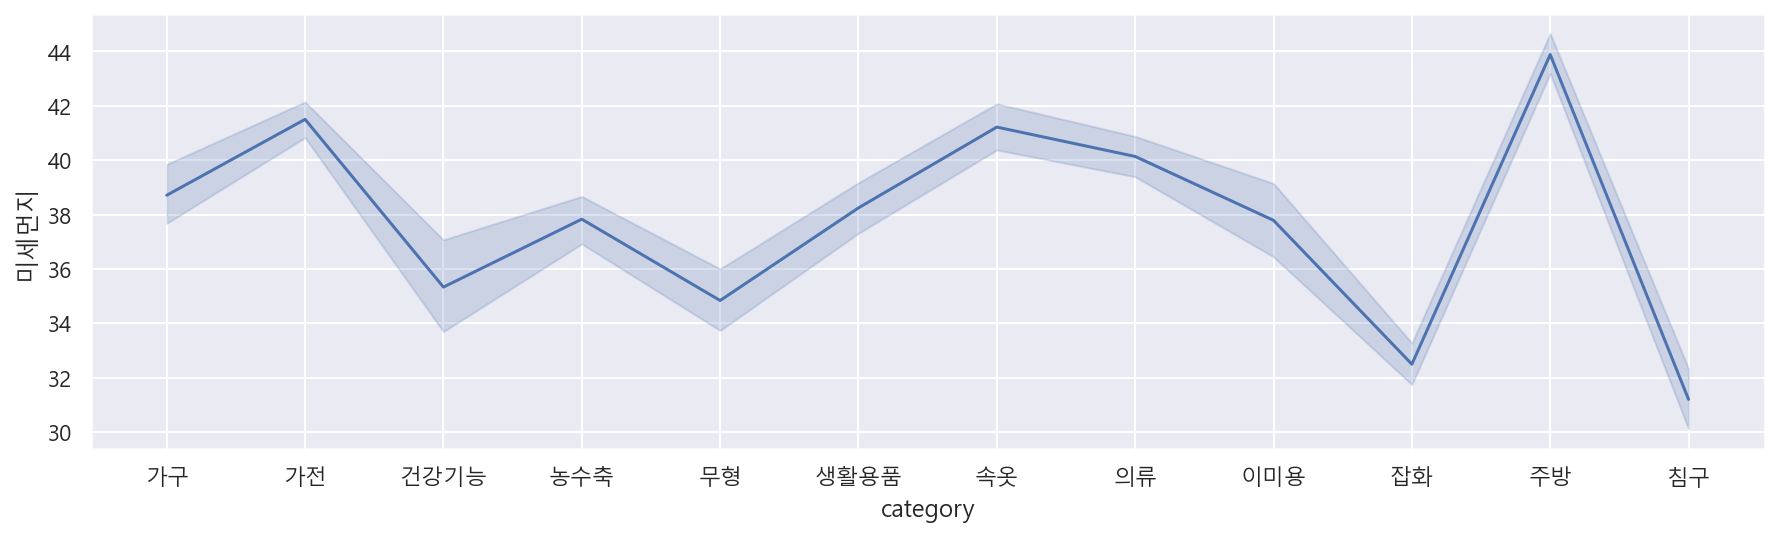

In [185]:
# 미세먼지 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='미세먼지')


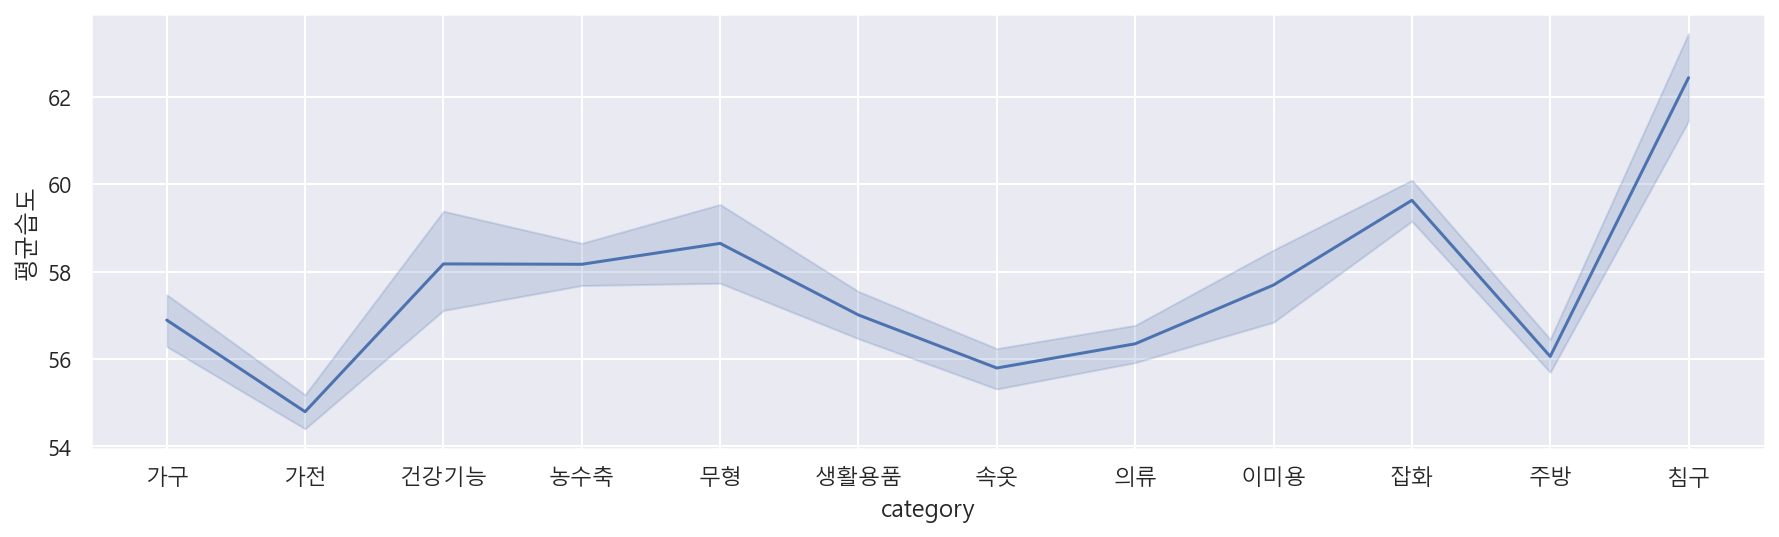

In [186]:
# 평균습도 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='평균습도')

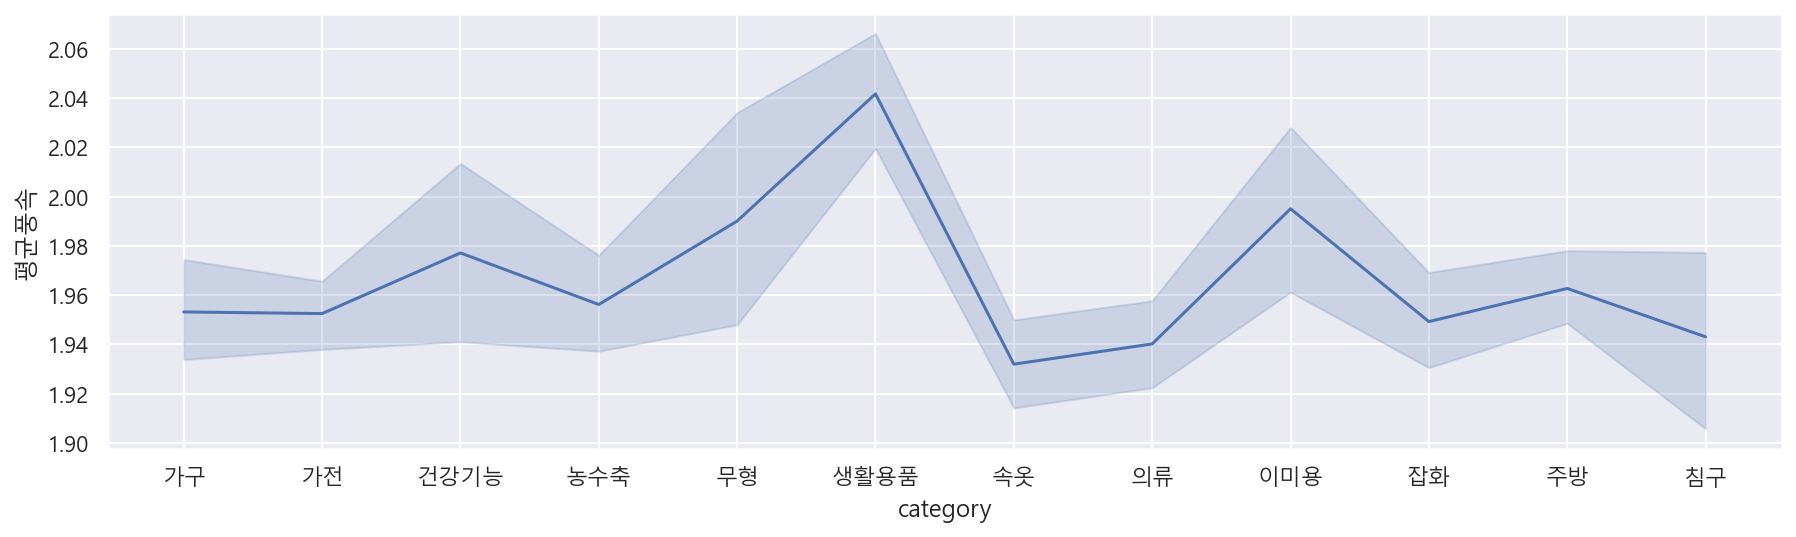

In [187]:
# 평균풍속 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='평균풍속')

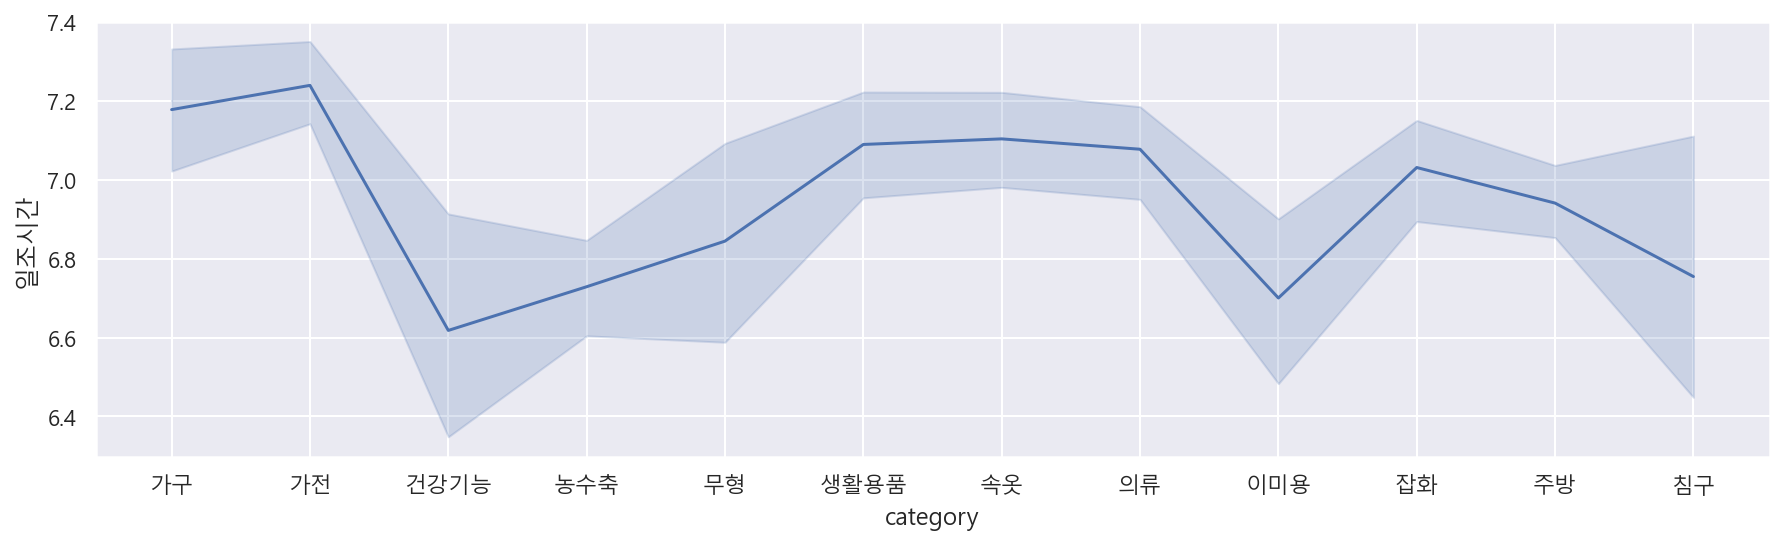

In [188]:
# 일조시간 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='일조시간')

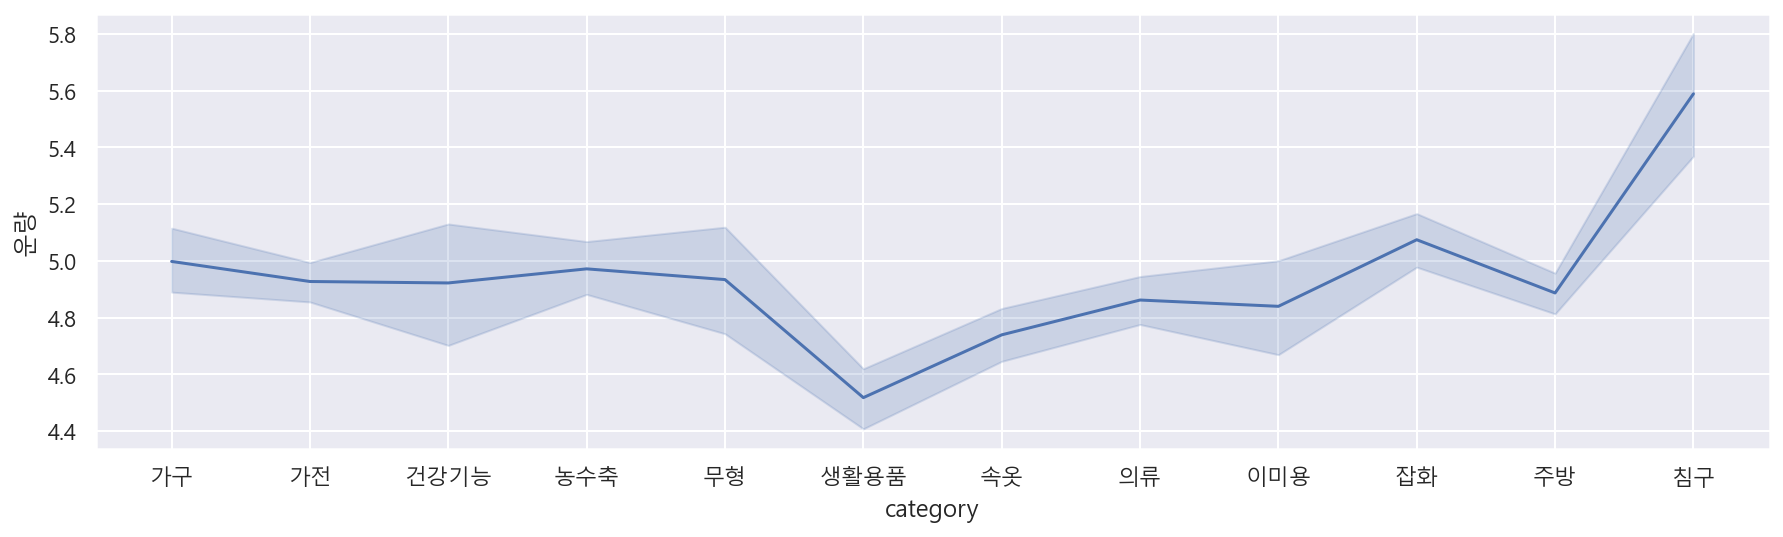

In [192]:
# 일조시간 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='운량')

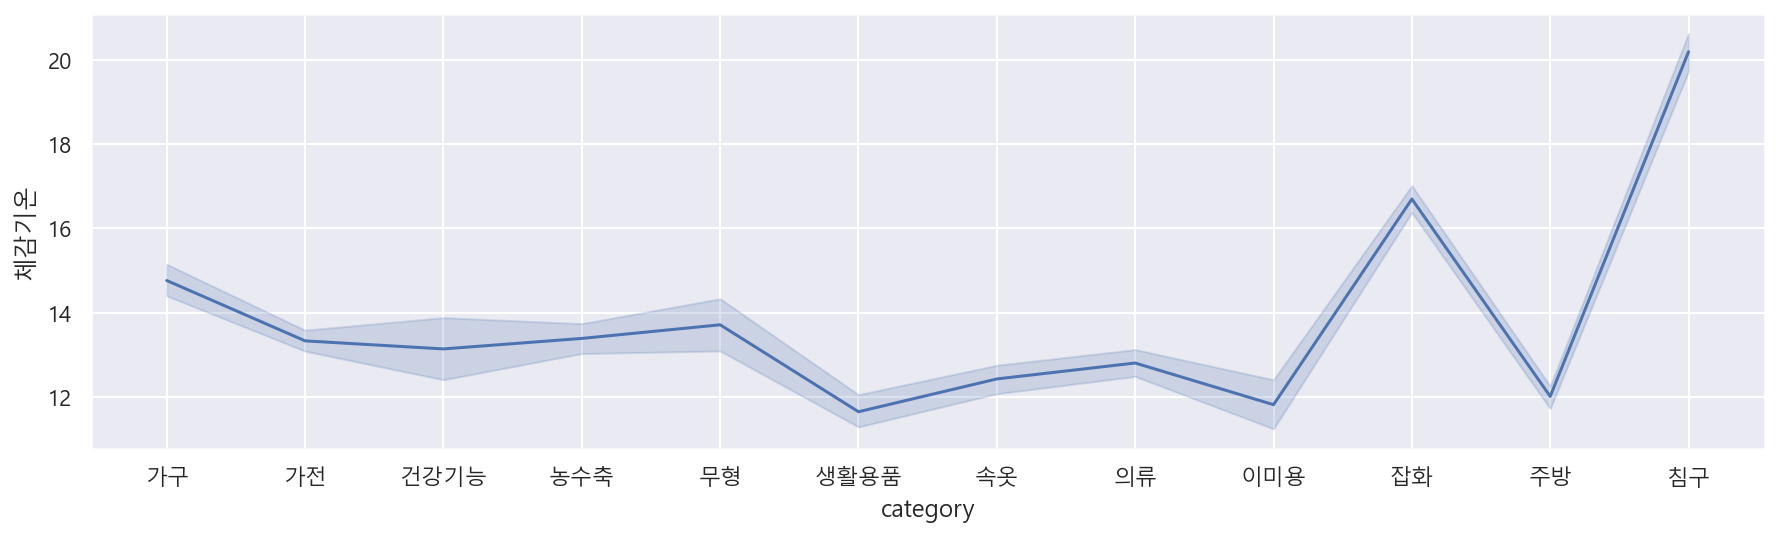

In [193]:
# 일조시간 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='체감기온')

In [5]:
# 파일불러오기 ( NS 홈쇼핑 - 실적 데이터 )
ratings = pd.read_csv("시청률(가로).csv", encoding ="cp949")
ratings

시간대   2:00   2:01   2:02   2:03   2:04   2:05  \
0                  2019-01-01  0.000  0.000  0.000  0.000  0.000  0.000   
1                  2019-01-02  0.000  0.000  0.000  0.000  0.000  0.000   
2                  2019-01-03  0.000  0.000  0.000  0.014  0.000  0.000   
3                  2019-01-04  0.000  0.000  0.000  0.000  0.000  0.000   
4                  2019-01-05  0.000  0.000  0.000  0.000  0.000  0.000   
..                        ...    ...    ...    ...    ...    ...    ...   
361                2019-12-28  0.000  0.000  0.000  0.000  0.000  0.000   
362                2019-12-29  0.000  0.000  0.000  0.000  0.000  0.000   
363                2019-12-30  0.000  0.000  0.000  0.000  0.000  0.000   
364                2019-12-31  0.000  0.012  0.000  0.000  0.000  0.000   
365  2019-01-01 to 2019-12-31  0.003  0.003  0.004  0.004  0.004  0.004   

      2:06   2:07   2:08  ...   1:51   1:52   1:53   1:54   1:55   1:56  \
0    0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
1    0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
2    0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
3    0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
4    0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.027   
..     ...    ...    ...  ...    ...    ...    ...    ...    ...    ...   
361  0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
362  0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
363  0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
364  0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
365  0.003  0.003  0.003  ...  0.004  0.004  0.004  0.004  0.004  0.004   

      1:57   1:58   1:59  월화수목금토일02:00-01:59  
0    0.000  0.000  0.000               0.004  
1    0.000  0.000  0.000               0.006  
2    0.000  0.000  0.000               0.002  
3    0.000  0.000  0.000               0.003  
4    0.000  0.000  0.000               0.002  
..     ...    ...    ...                 ...  
361  0.000  0.000  0.000               0.006  
362  0.000  0.000  0.000               0.004  
363  0.000  0.019  0.000               0.005  
364  0.000  0.000  0.000               0.005  
365  0.004  0.004  0.004               0.004  

[366 rows x 1442 columns]

In [6]:
ratings['YMD'] = ratings['시간대'].astype(str)
ratings['YMD'].head(100) # 확인 완료 

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
95    2019-04-06
96    2019-04-07
97    2019-04-08
98    2019-04-09
99    2019-04-10
Name: YMD, Length: 100, dtype: object

In [7]:
# 파일불러오기 ( 날씨 데이터 (평균,최저,최고, 강수량 전국 평균) )
weather1 = pd.read_csv("서울.csv",encoding='cp949')
weather1

YMD  평균기온  최고기온  최저기온  강수량  신적설  평균풍속  평균습도   운량  일조시간  미세먼지  \
0    2019-01-01  -5.0  -0.6  -8.2  0.0  0.0   2.2    50  3.4   7.5  41.0   
1    2019-01-02  -4.9   0.2  -8.8  0.0  0.0   1.7    43  0.0   8.7  38.0   
2    2019-01-03  -3.5   3.2  -8.4  0.0  0.0   1.3    39  0.1   8.7  41.0   
3    2019-01-04  -1.1   4.1  -6.2  0.0  0.0   1.2    56  5.5   3.9  77.0   
4    2019-01-05  -2.8   1.1  -5.5  0.0  0.0   2.2    40  0.5   8.6  73.0   
..          ...   ...   ...   ...  ...  ...   ...   ...  ...   ...   ...   
360  2019-12-27  -1.7   2.6  -4.6  0.0  0.0   2.2    45  0.0   9.0  37.0   
361  2019-12-28   1.1   6.1  -3.6  0.0  0.0   2.0    48  3.5   5.8  47.0   
362  2019-12-29   3.8   6.2   1.1  1.4  0.0   3.0    53  9.0   0.0  47.0   
363  2019-12-30   2.6   6.8  -5.7  0.4  0.0   2.9    70  7.5   0.0  43.0   
364  2019-12-31  -7.9  -4.5 -10.9  0.0  0.0   3.1    39  1.2   9.1  31.0   

              날씨  
0           구름조금  
1             맑음  
2             맑음  
3        구름많음/안개  
4          맑음/안개  
..           ...  
360        맑음/안개  
361         구름조금  
362         흐림/비  
363  구름많음/눈/비/안개  
364         맑음/눈  

[365 rows x 12 columns]

In [8]:
# 파일 결합, 저장(이름이 같은 컬럼 필수!!)
ratings = pd.merge(ratings, weather1)
ratings = pd.DataFrame(ratings)
ratings.to_csv('C:/Users/rmafu/Desktop/bigcon-master/bigcon-master/ratings_seoul_weather.csv')

In [9]:
ratings

시간대  2:00   2:01  2:02   2:03  2:04  2:05  2:06  2:07  2:08  ...  \
0    2019-01-01   0.0  0.000   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
1    2019-01-02   0.0  0.000   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
2    2019-01-03   0.0  0.000   0.0  0.014   0.0   0.0   0.0   0.0   0.0  ...   
3    2019-01-04   0.0  0.000   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
4    2019-01-05   0.0  0.000   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
..          ...   ...    ...   ...    ...   ...   ...   ...   ...   ...  ...   
360  2019-12-27   0.0  0.000   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
361  2019-12-28   0.0  0.000   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
362  2019-12-29   0.0  0.000   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
363  2019-12-30   0.0  0.000   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   
364  2019-12-31   0.0  0.012   0.0  0.000   0.0   0.0   0.0   0.0   0.0  ...   

     최고기온  최저기온  강수량  신적설  평균풍속  평균습도   운량  일조시간  미세먼지           날씨  
0    -0.6  -8.2  0.0  0.0   2.2    50  3.4   7.5  41.0         구름조금  
1     0.2  -8.8  0.0  0.0   1.7    43  0.0   8.7  38.0           맑음  
2     3.2  -8.4  0.0  0.0   1.3    39  0.1   8.7  41.0           맑음  
3     4.1  -6.2  0.0  0.0   1.2    56  5.5   3.9  77.0      구름많음/안개  
4     1.1  -5.5  0.0  0.0   2.2    40  0.5   8.6  73.0        맑음/안개  
..    ...   ...  ...  ...   ...   ...  ...   ...   ...          ...  
360   2.6  -4.6  0.0  0.0   2.2    45  0.0   9.0  37.0        맑음/안개  
361   6.1  -3.6  0.0  0.0   2.0    48  3.5   5.8  47.0         구름조금  
362   6.2   1.1  1.4  0.0   3.0    53  9.0   0.0  47.0         흐림/비  
363   6.8  -5.7  0.4  0.0   2.9    70  7.5   0.0  43.0  구름많음/눈/비/안개  
364  -4.5 -10.9  0.0  0.0   3.1    39  1.2   9.1  31.0         맑음/눈  

[365 rows x 1454 columns]

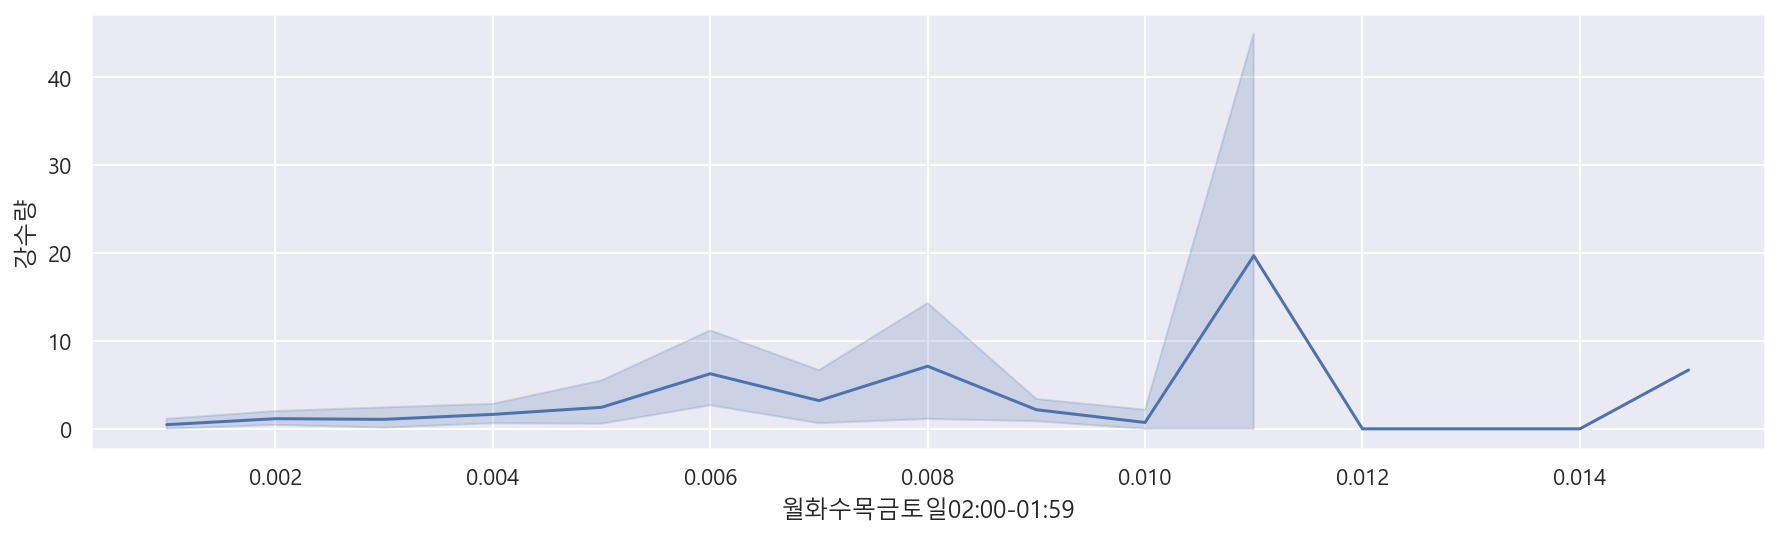

In [10]:
plt.figure(figsize=(15,4))
sns.lineplot(data=ratings , x= '월화수목금토일02:00-01:59', y ='강수량' )

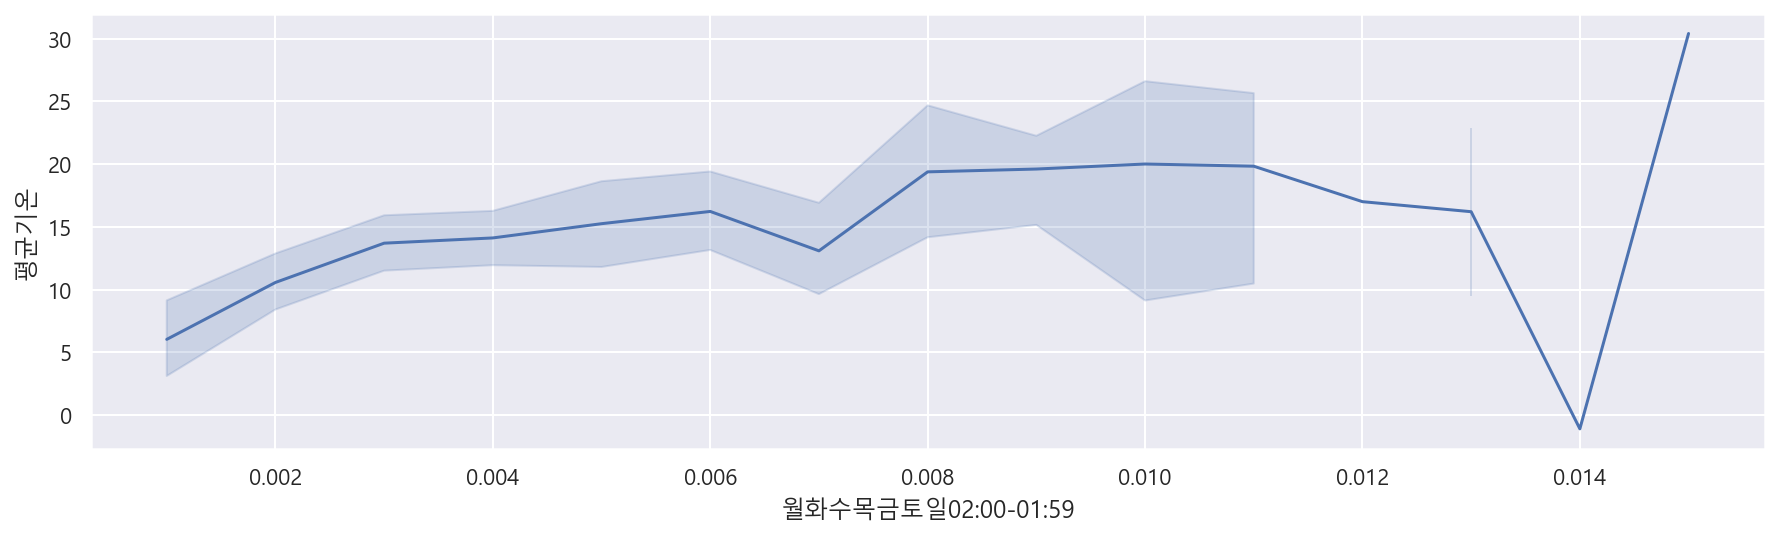

In [11]:
plt.figure(figsize=(15,4))
sns.lineplot(data=ratings , x= '월화수목금토일02:00-01:59', y ='평균기온' )

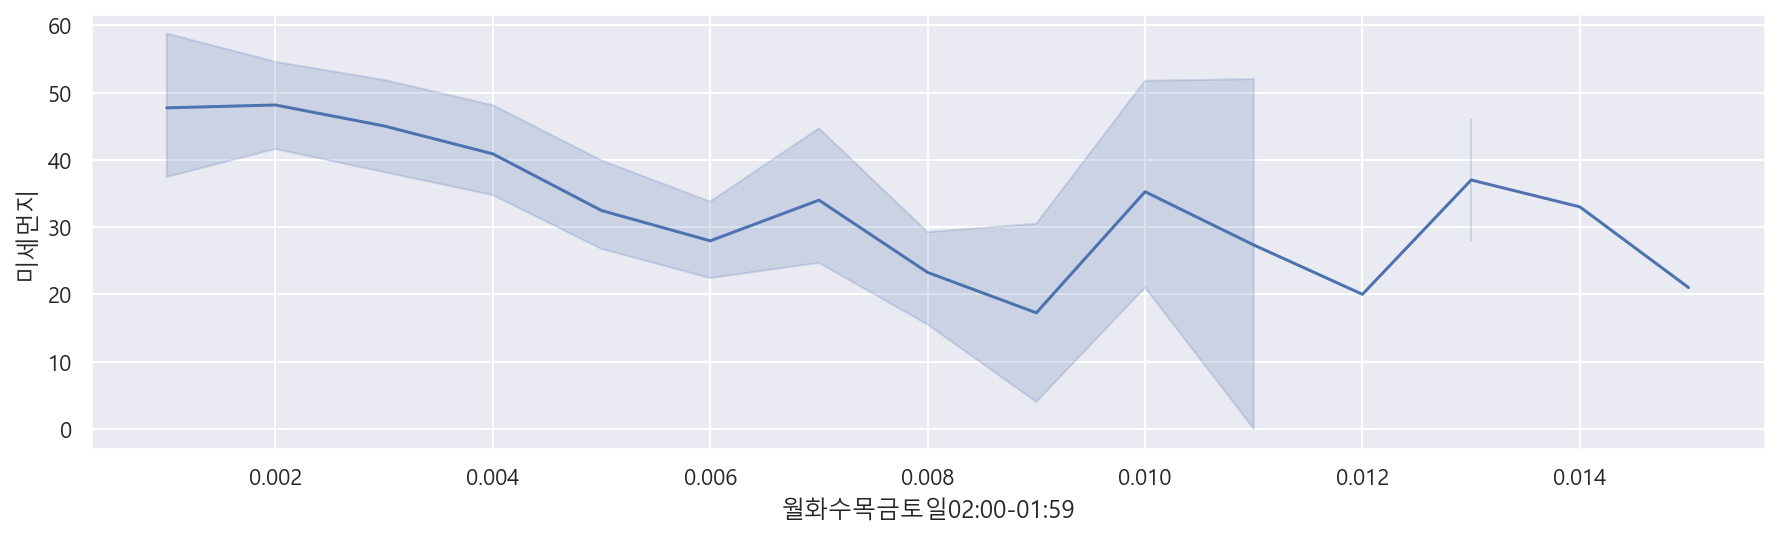

In [12]:
plt.figure(figsize=(15,4))
sns.lineplot(data=ratings , x= '월화수목금토일02:00-01:59', y ='미세먼지' )

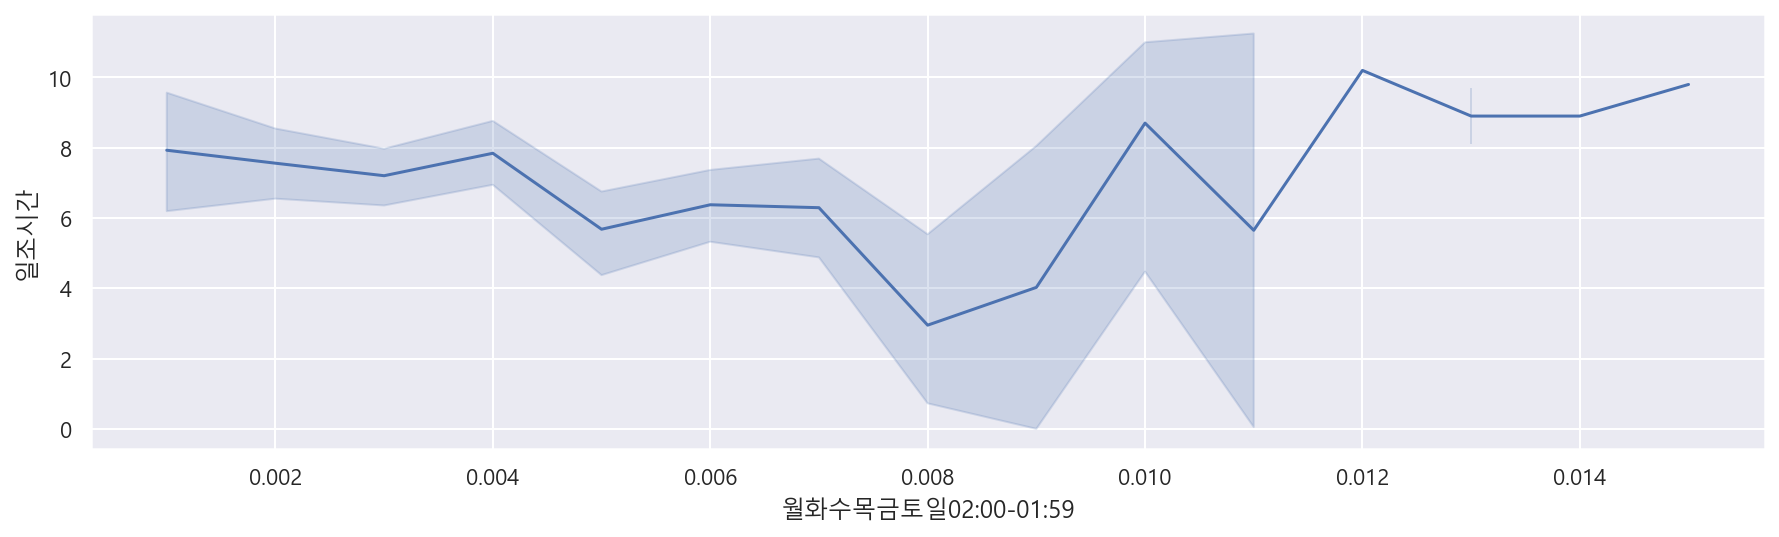

In [13]:
plt.figure(figsize=(15,4))
sns.lineplot(data=ratings , x= '월화수목금토일02:00-01:59', y ='일조시간' )

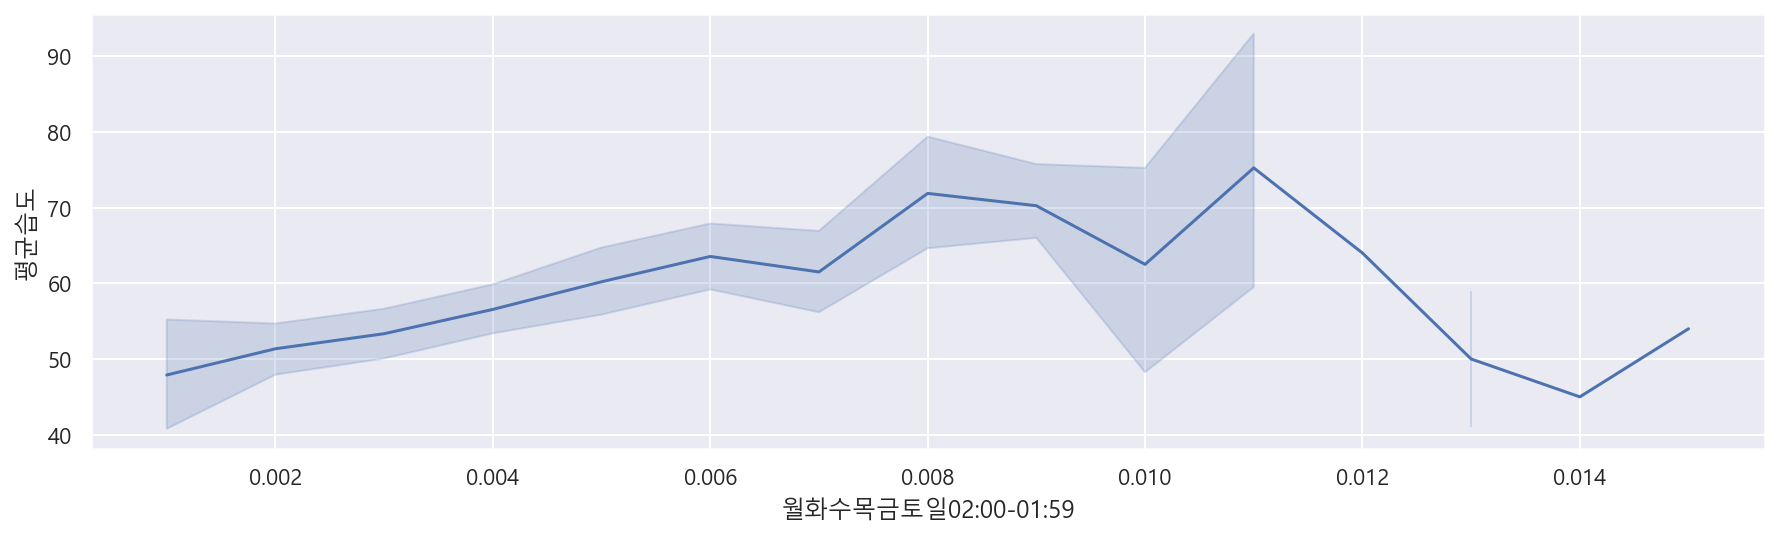

In [14]:
plt.figure(figsize=(15,4))
sns.lineplot(data=ratings , x= '월화수목금토일02:00-01:59', y ='평균습도' )